# variables and their meaning
 numcol == colums with numerical values
 missing == all the columns having missing values and no missing values
 missingper == missing value ratio of columns
 miss_col == columns with missing value
 nomiss_col == columns with no missing values
 char_col == colums with object dtype

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from src.util import catgvssale,contvssale,contvscont,check_column_skewness,remove_skewness,plot_contv


# Importing dataset

In [17]:
df = pd.read_csv("data/raw/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Selecting the numeric columns

In [20]:
numerics =['int16','int32','int64','float16','float32','float64']
numcol = df.select_dtypes(include=numerics)
len(numcol)
numcol

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [21]:
char_col = df.select_dtypes(include=object)
char_col

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Finding the missing ratio and plotting the graph

In [22]:
missing = df.isna().sum().sort_values(ascending=False)
missing

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [23]:
missingper = df.isna().sum().sort_values(ascending=False)/len(df)
missingper.head(10)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
FireplaceQu    0.472603
LotFrontage    0.177397
GarageYrBlt    0.055479
GarageCond     0.055479
GarageType     0.055479
dtype: float64

<Axes: >

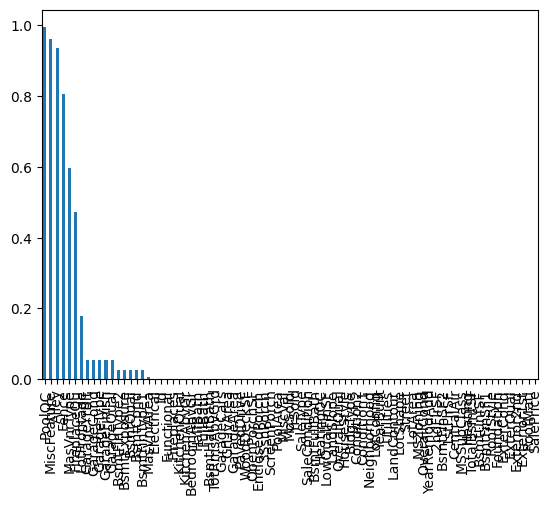

In [24]:
missingper.plot(kind='bar')

# columns with missing value

In [25]:
miss_col = missingper[missingper!=0]
miss_col
miss_col.head(19)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

<Axes: >

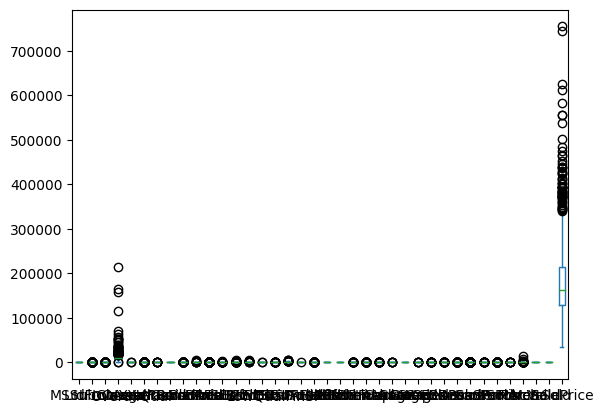

In [26]:
df.plot(kind='box')

# columns with no missing value

In [27]:
nomiss_col = missingper[missingper == 0]
nomiss_col
nomiss_col.info()

<class 'pandas.core.series.Series'>
Index: 62 entries, Id to SalePrice
Series name: None
Non-Null Count  Dtype  
--------------  -----  
62 non-null     float64
dtypes: float64(1)
memory usage: 992.0+ bytes


# Analysis and visualization
## columns that will be analyzed:
    1.MSZoning
    2.YearBuilt
    3.Electrical
    4.Foundation
    5.BldgType
    

In [28]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
df.MSZoning

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

# C (all) is not present in the description

In [30]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

# Seaborn scatterplot with linear regression line

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

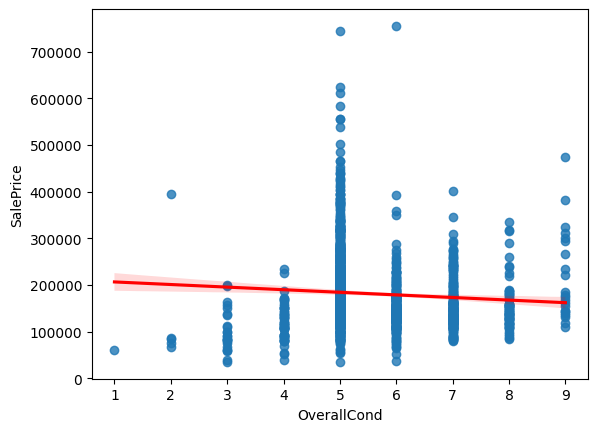

In [31]:

sb.regplot(x = 'OverallCond',y='SalePrice', data=df,line_kws={"color": "red"})

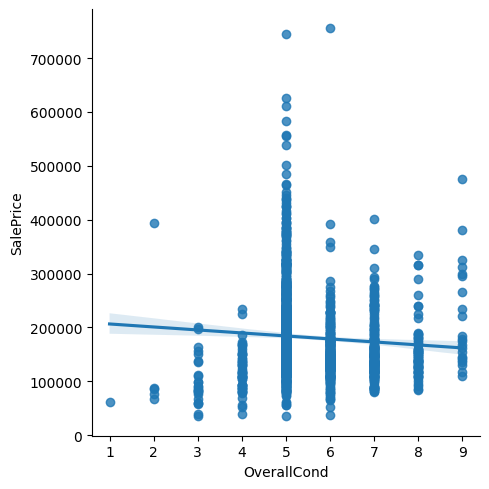

In [32]:
sb.lmplot(x = 'OverallCond',y='SalePrice', data=df)

In [33]:
df.Condition1.value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [34]:
df.SalePrice
df.SalePrice.value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

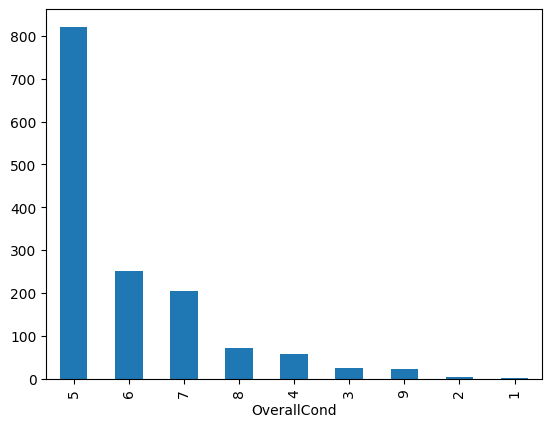

In [35]:

x=df["SalePrice"].value_counts()
y=df["OverallCond"].value_counts()
z=df["OverallQual"].value_counts()
y.plot(kind='bar')
plt.show()


<Axes: xlabel='OverallCond'>

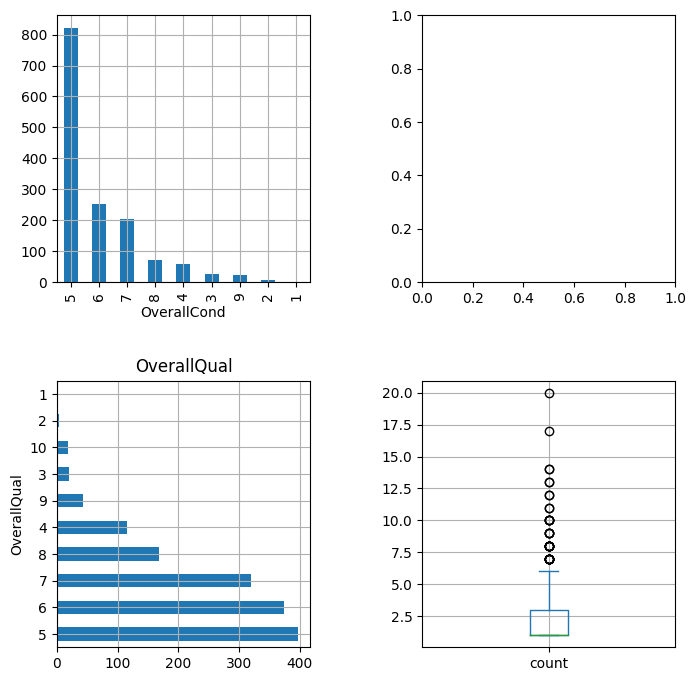

In [36]:

fig, axes = plt.subplots(figsize=(8,8),nrows=2, ncols=2)
fig.tight_layout(pad=5)
ax=plt.subplot(2,2,3)
ax.set_title("SalePrice")
x.plot(ax=axes[1,1], kind='box', grid=True)

z.plot(ax=axes[1,0],kind='barh',grid=True)
ax.set_title("OverallQual")
y.plot(ax =axes[0,0],kind='bar',grid=True)
#ax.set_title("OverallCond")



<Axes: ylabel='Frequency'>

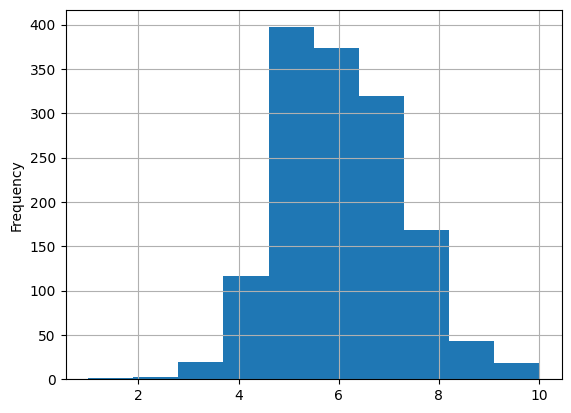

In [37]:
df["OverallQual"].plot(kind='hist',grid=True)

# CONTINUOUS VARIABLE VS TARGET VARIABLE

<Axes: title={'center': 'lotarea vs saleprice regplot'}, xlabel='LotArea', ylabel='SalePrice'>

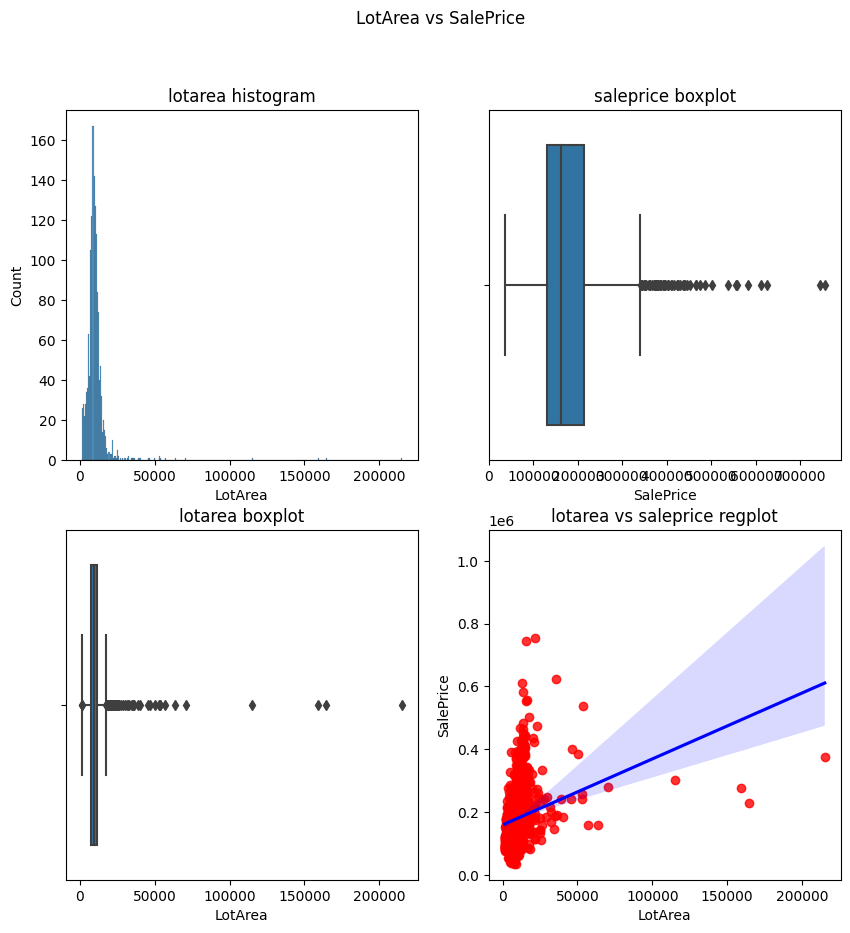

In [38]:
l = df["LotArea"].value_counts()
s = df['SalePrice'].value_counts()

fig, axes = plt.subplots(2,2,figsize=(10,10))
#fig.tight_layout(pad=5,w_pad=5)
fig.suptitle("LotArea vs SalePrice")

axes[0,0].set_title("lotarea histogram")
axes[0,1].set_title("saleprice boxplot")
axes[1,0].set_title("lotarea boxplot")
axes[1,1].set_title("lotarea vs saleprice regplot")


sb.histplot(ax = axes[0,0], data=df,x='LotArea')
sb.boxplot(ax = axes[0,1],data = df, x='SalePrice')
sb.boxplot(ax = axes[1,0],data = df,x='LotArea')
sb.regplot(ax = axes[1,1],data = df,x='LotArea',y='SalePrice',scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<Axes: xlabel='count', ylabel='OverallQual'>

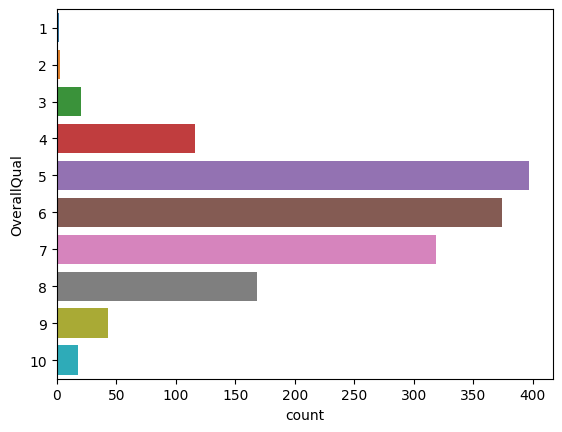

In [39]:
sb.countplot( y = 'OverallQual', data = df)

<Axes: xlabel='SalePrice', ylabel='OverallQual'>

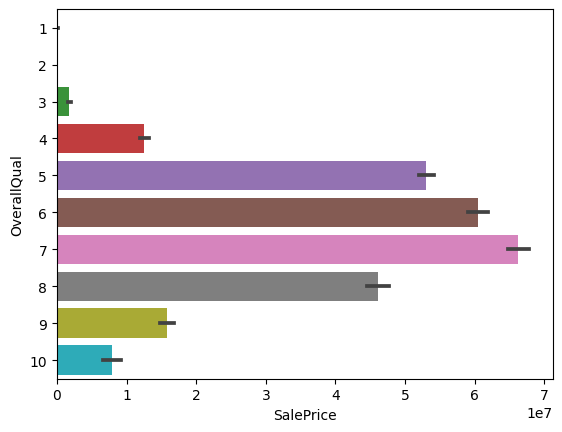

In [40]:
sb.barplot(data = df, x='SalePrice',y='OverallQual', orient= "h", estimator=sum)


<Axes: xlabel='SalePrice', ylabel='OverallQual'>

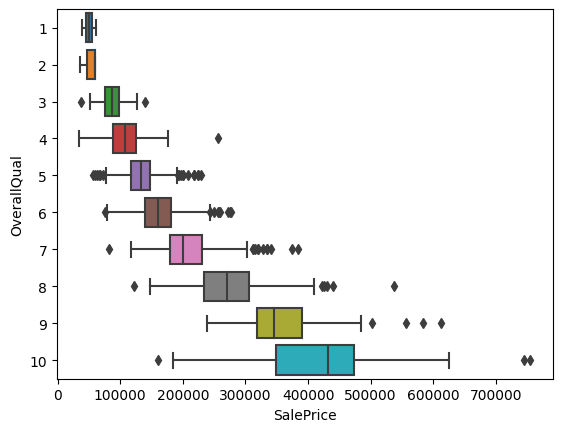

In [41]:
sb.boxplot(data = df, x='SalePrice',y='OverallQual', orient= "h")

# ORDINAL/CATEGORICAL VARIABLE VS TARGET VAIRABLE

<Axes: title={'center': 'boxplot sale price'}, xlabel='SalePrice', ylabel='OverallQual'>

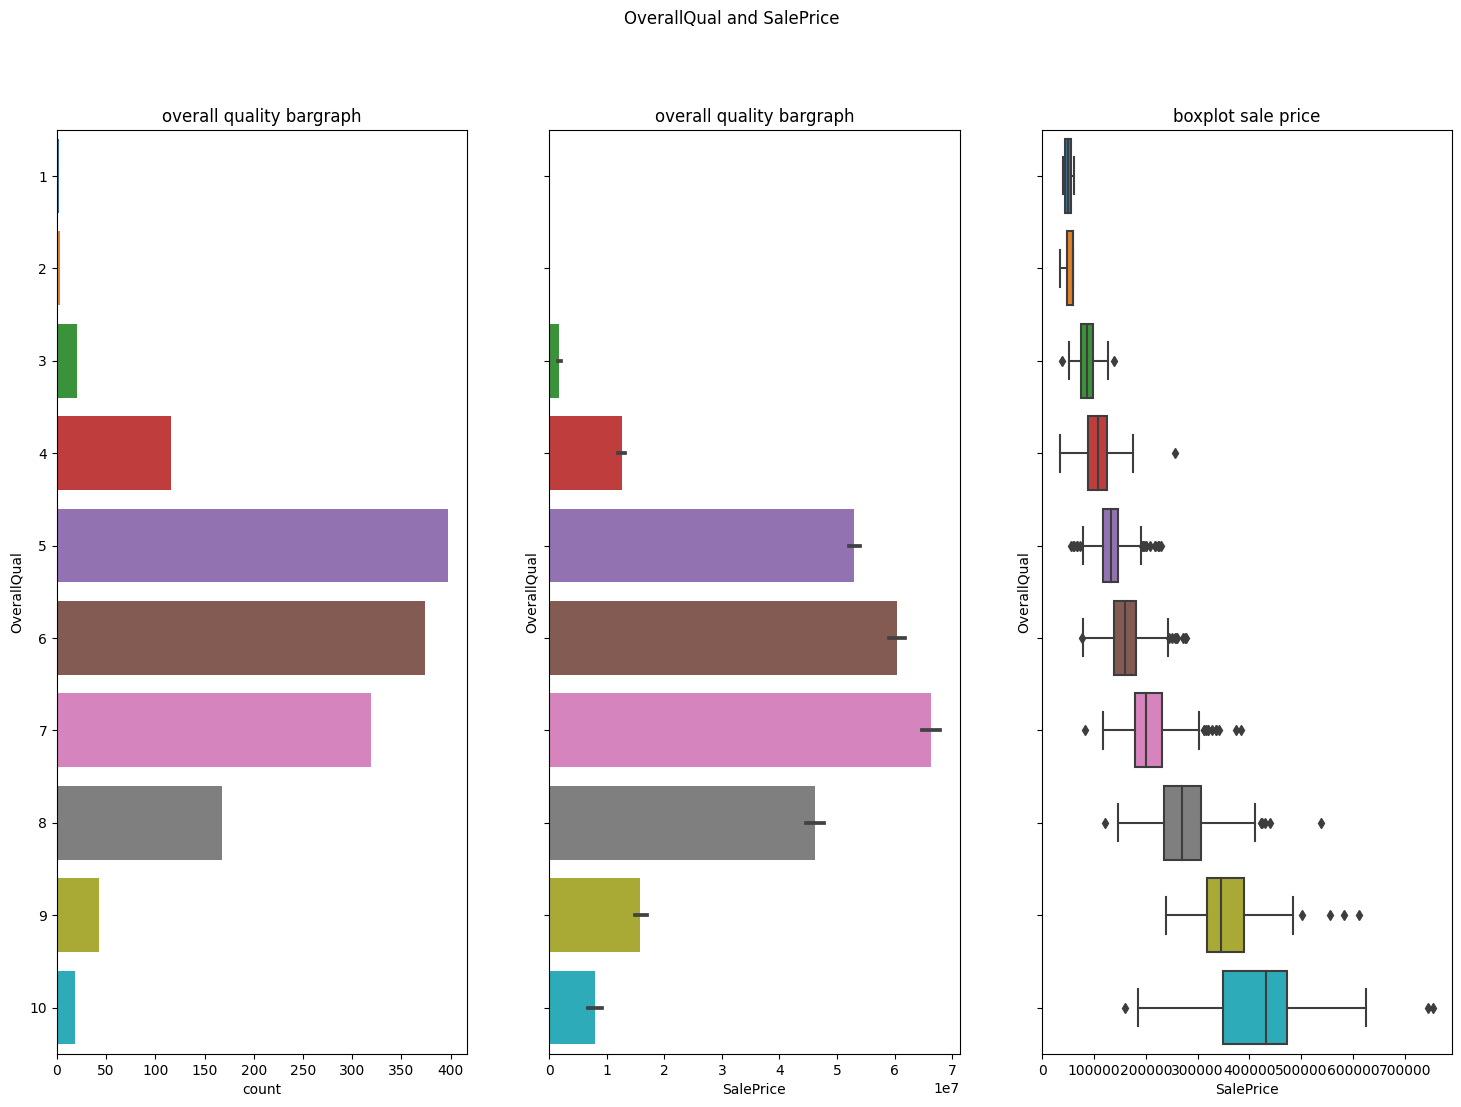

In [42]:
q = df["OverallQual"].value_counts()
s = df["SalePrice"].value_counts()

fig, axes = plt.subplots(1,3,figsize=(18,12), sharey = True)
# fig.tight_layout(pad=3,h_pad=5)
fig.suptitle('OverallQual and SalePrice')


axes[0].set_title("overall quality bargraph")
sb.countplot(ax = axes[0], y = 'OverallQual', data = df)



axes[1].set_title("overall quality bargraph")
sb.barplot(ax = axes[1],data = df, x='SalePrice',y='OverallQual', orient= "h", estimator=sum)

axes[2].set_title("boxplot sale price")
sb.boxplot(ax = axes[2],data = df, x='SalePrice',y='OverallQual', orient= "h")

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

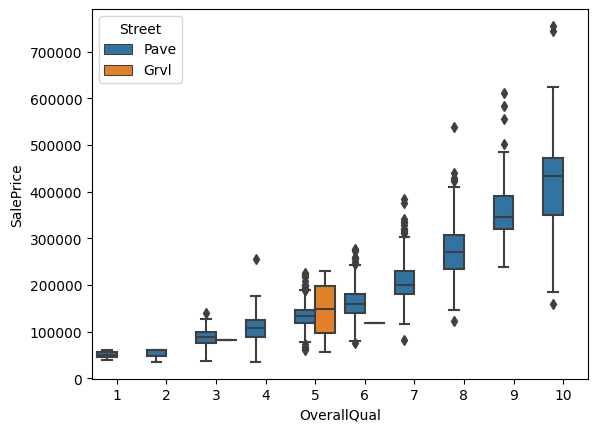

In [43]:
sb.boxplot(data = df, x='OverallQual',y='SalePrice',hue="Street")

# FUNCTION FOR CONTINUOUS VARIABLES VS SALE PRICE

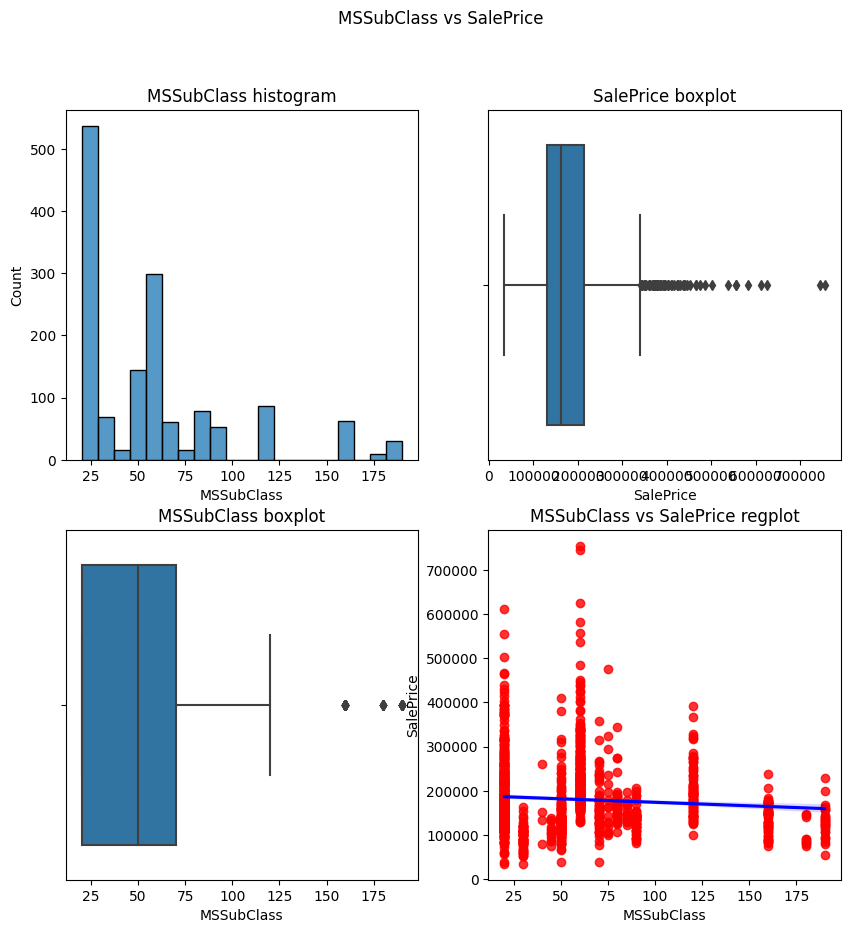

In [44]:
from src.util import contvssale
contvssale(contvar= "MSSubClass", df = df)

In [45]:
contvar = "hi"
tarvar = "bye"
#formatting function
f"{contvar} vs {tarvar}"


'hi vs bye'

#  FUNCTION FOR CATEGORICAL VARIABLES VS SALE PRICE

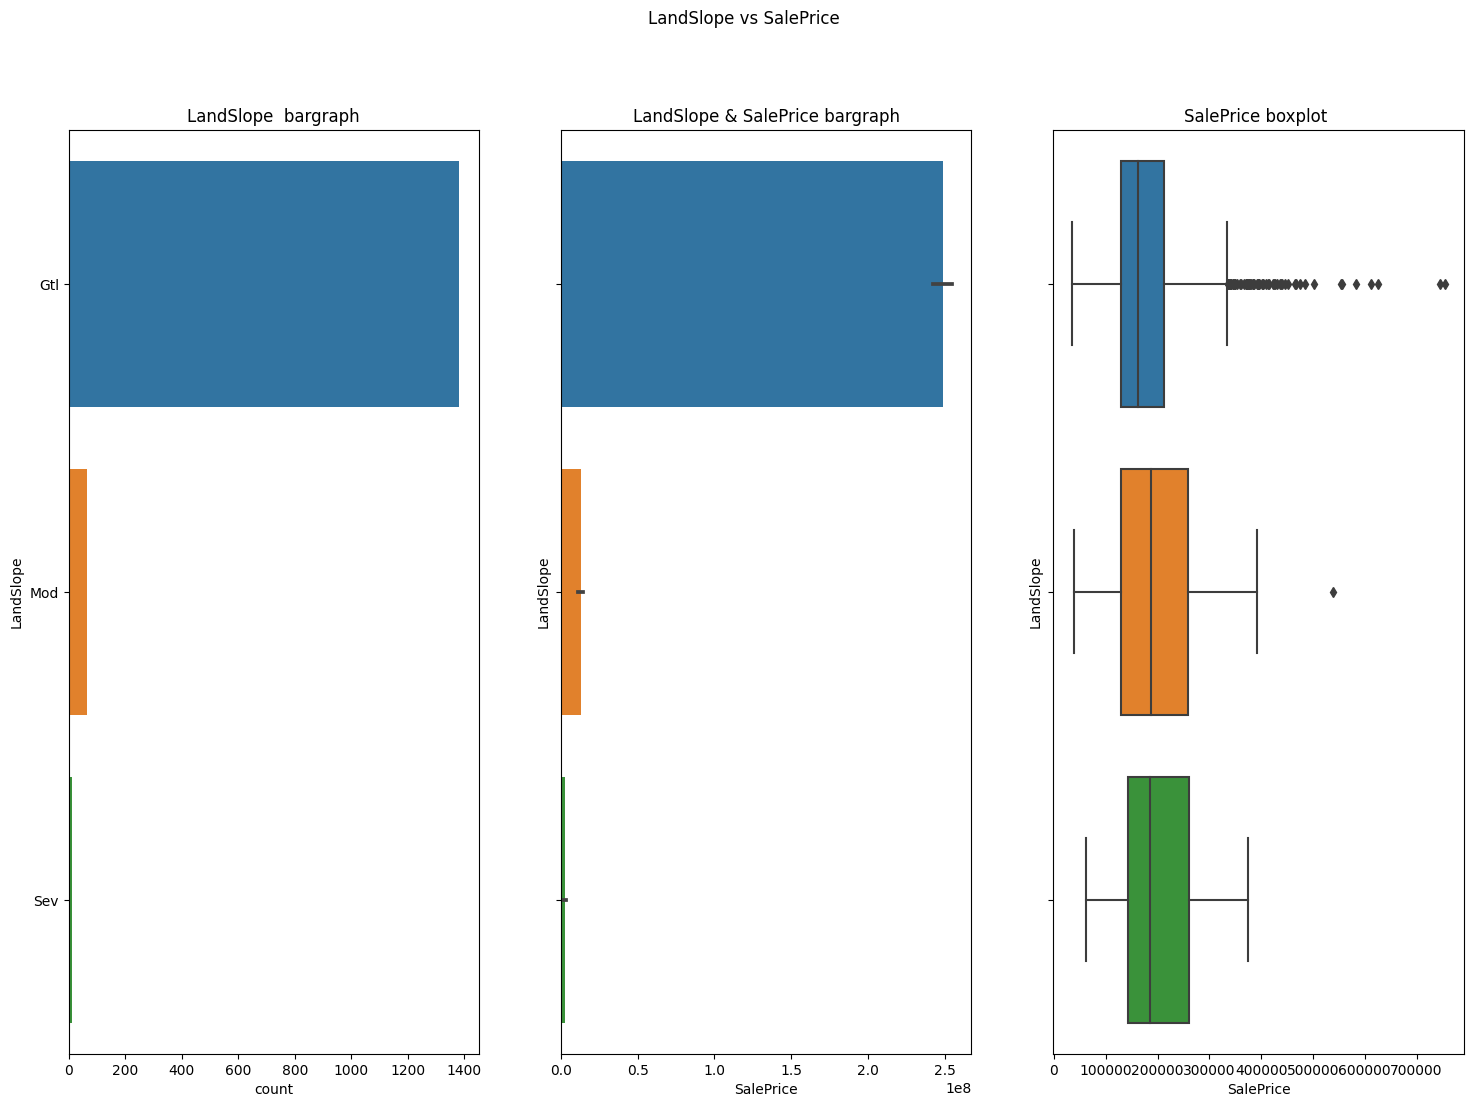

In [46]:

catgvssale(catgvar= "LandSlope", df = df)

# Finding out skewed data and handling those data through functions

In [47]:
def check_skewness(df):
    skewness = pd.DataFrame({'Column': [], 'Skewness': []})

    for column in df.columns:
        if df[column].dtype != 'object':
            skew = df[column].skew()
            skewness = pd.concat([skewness, pd.DataFrame({'Column': [column], 'Skewness': [skew]})], ignore_index=True)
            skewness_sort = skewness.sort_values(by='Skewness', ascending=False)
    return skewness_sort

In [48]:
skw_result = check_skewness(df)
print(skw_result)

           Column   Skewness
34        MiscVal  24.476794
33       PoolArea  14.828374
3         LotArea  12.207688
31      3SsnPorch  10.304342
15   LowQualFinSF   9.011341
22   KitchenAbvGr   4.488397
10     BsmtFinSF2   4.255261
32    ScreenPorch   4.122214
18   BsmtHalfBath   4.103403
30  EnclosedPorch   3.089872
8      MasVnrArea   2.669084
29    OpenPorchSF   2.364342
2     LotFrontage   2.163569
37      SalePrice   1.882876
9      BsmtFinSF1   1.685503
28     WoodDeckSF   1.541376
12    TotalBsmtSF   1.524255
1      MSSubClass   1.407657
13       1stFlrSF   1.376757
16      GrLivArea   1.366560
11      BsmtUnfSF   0.920268
14       2ndFlrSF   0.813030
5     OverallCond   0.693067
23   TotRmsAbvGrd   0.676341
20       HalfBath   0.675897
24     Fireplaces   0.649565
17   BsmtFullBath   0.596067
4     OverallQual   0.216944
35         MoSold   0.212053
21   BedroomAbvGr   0.211790
27     GarageArea   0.179981
36         YrSold   0.096269
19       FullBath   0.036562
0             

# Function to handle the skewed data

In [49]:
def log_transform_skewed_data(df, skew_threshold=0.5):
    skewness = pd.DataFrame(columns=['Column', 'Skewness'])
    transformed_df = pd.DataFrame()

    # Finding columns with skewness above the threshold
    for column in df.columns:
        if df[column].dtype != 'object':
            skew = df[column].skew()
            skewness = pd.concat([skewness, pd.DataFrame({'Column': [column], 'Skewness': [skew]})], ignore_index=True)
            if abs(skew) > skew_threshold:
                transformed_df[column] = np.log1p(df[column])
            else:
                transformed_df[column] = df[column]

    return transformed_df

transformed_df = log_transform_skewed_data(df, skew_threshold=0.5)
print(transformed_df)

        Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond   
0        1    4.110874     4.189655  9.042040            7     1.791759  \
1        2    3.044522     4.394449  9.169623            6     2.197225   
2        3    4.110874     4.234107  9.328212            7     1.791759   
3        4    4.262680     4.110874  9.164401            7     1.791759   
4        5    4.110874     4.442651  9.565284            8     1.791759   
...    ...         ...          ...       ...          ...          ...   
1455  1456    4.110874     4.143135  8.976894            6     1.791759   
1456  1457    3.044522     4.454347  9.486152            6     1.945910   
1457  1458    4.262680     4.204693  9.109746            7     2.302585   
1458  1459    3.044522     4.234107  9.181735            5     1.945910   
1459  1460    3.044522     4.330733  9.204121            5     1.945910   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF   
0      7.602900      7.60

# Function to check skewness of a single column and handle that using log transformation

In [50]:
def check_column_skewness(df, column_name):
    skewness = df[column_name].skew()
    return skewness

In [51]:
check_column_skewness(df,"OverallCond")

0.6930674724842182

In [52]:
df = df.fillna(0)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


# Feature Selection 


In [53]:
encoded_df = pd.get_dummies(df)
encoded_df = encoded_df.astype(int)
encoded_df.describe


<bound method NDFrame.describe of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond   
0        1          60           65     8450            7            5  \
1        2          20           80     9600            6            8   
2        3          60           68    11250            7            5   
3        4          70           60     9550            7            5   
4        5          60           84    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60           62     7917            6            5   
1456  1457          20           85    13175            6            6   
1457  1458          70           66     9042            7            9   
1458  1459          20           68     9717            5            6   
1459  1460          20           75     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw   

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(encoded_df.drop(labels=['SalePrice'], axis=1),encoded_df['SalePrice'],test_size=0.3,random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info.shape

(304,)

In [55]:
mutual_info = pd.Series(mutual_info)
print(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False).head(25)

0      0.000000
1      0.064353
2      0.101542
3      0.078921
4      0.475251
         ...   
299    0.000000
300    0.000000
301    0.000000
302    0.030009
303    0.072498
Length: 304, dtype: float64


OverallQual         0.475251
GarageCars          0.378739
GrLivArea           0.358825
GarageArea          0.341369
TotalBsmtSF         0.267394
YearBuilt           0.263849
1stFlrSF            0.260742
FullBath            0.257939
ExterQual_TA        0.238276
YearRemodAdd        0.223843
ExterQual_Gd        0.220060
KitchenQual_TA      0.209769
Fireplaces          0.183502
BsmtQual_TA         0.179606
Foundation_PConc    0.173207
FireplaceQu_0       0.170940
KitchenQual_Gd      0.168802
TotRmsAbvGrd        0.163173
HeatingQC_Ex        0.148440
BsmtQual_Gd         0.147540
BsmtFinSF1          0.139952
BsmtFinType1_GLQ    0.133478
2ndFlrSF            0.130510
GarageFinish_Unf    0.126815
BsmtQual_Ex         0.114626
dtype: float64

In [56]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=10)
selected_top_columns.fit(X_train.fillna(0), y_train)
selected_top_columns.get_support()

array([False, False,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [57]:
X_train.columns[selected_top_columns.get_support()]

Index(['LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'Exterior2nd_VinylSd', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'KitchenQual_Gd',
       'KitchenQual_TA', 'FireplaceQu_0', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Unf'],
      dtype='object')

In [58]:
check_column_skewness(df,"LotArea")

12.207687851233496

In [59]:


def remove_skewness(data, column_name):
    
    column_values = data[column_name]
    skewness = column_values.skew()
    if abs(skewness) > 1:
        
        column_values = np.log1p(column_values)

    
    data[column_name] = column_values
    return data

res = remove_skewness(df,"LotArea")
res


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,9.042040,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9.169623,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,9.328212,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9.164401,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,9.565284,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,8.976894,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,9.486152,Pave,0,Reg,Lvl,AllPub,...,0,0,MnPrv,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9.109746,Pave,0,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9.181735,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,142125


-0.13740448122837784

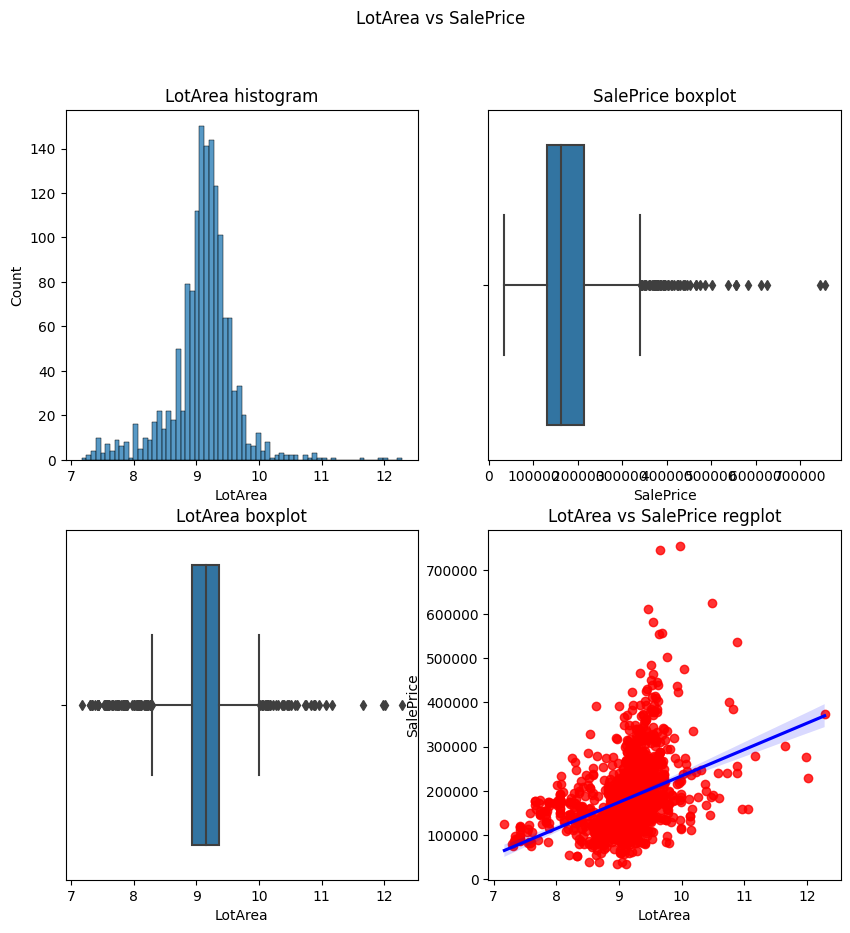

In [60]:
contvssale(contvar="LotArea",df= df)
check_column_skewness(df,"LotArea")

## SalePrice

In [61]:
check_column_skewness(df,"SalePrice")


1.8828757597682129

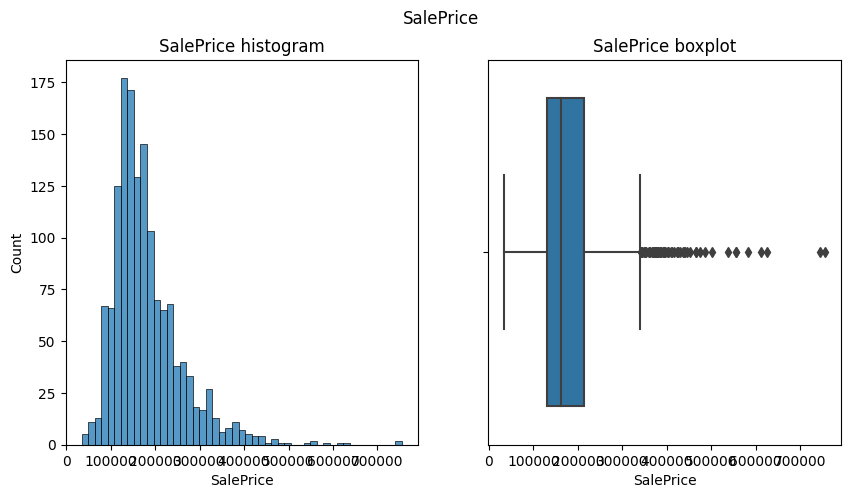

In [62]:


plot_contv(contvar="SalePrice",df=df)    

In [63]:
remove_skewness(df,"SalePrice")
check_column_skewness(df,"SalePrice")

0.12134661989685333

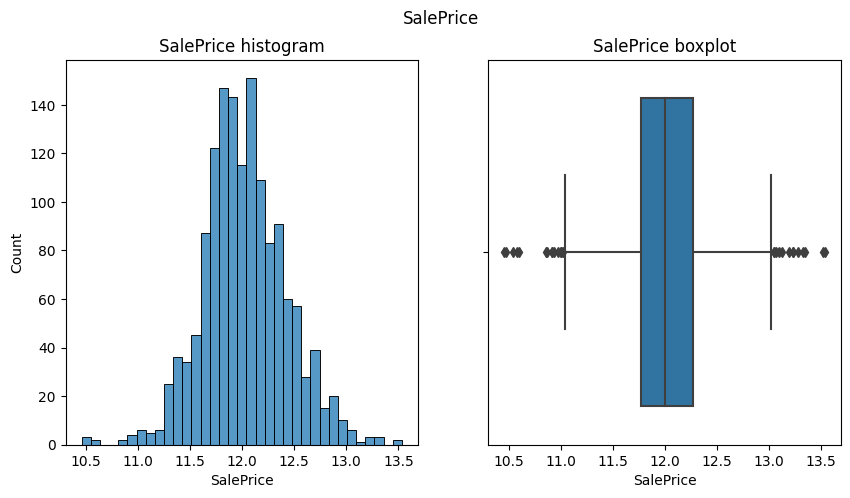

In [64]:
plot_contv(contvar="SalePrice",df=df)

## MSSubClass 
skewness = 1.40765674.

Skewness is very less hence it is acceptable.

1.4076567471495591

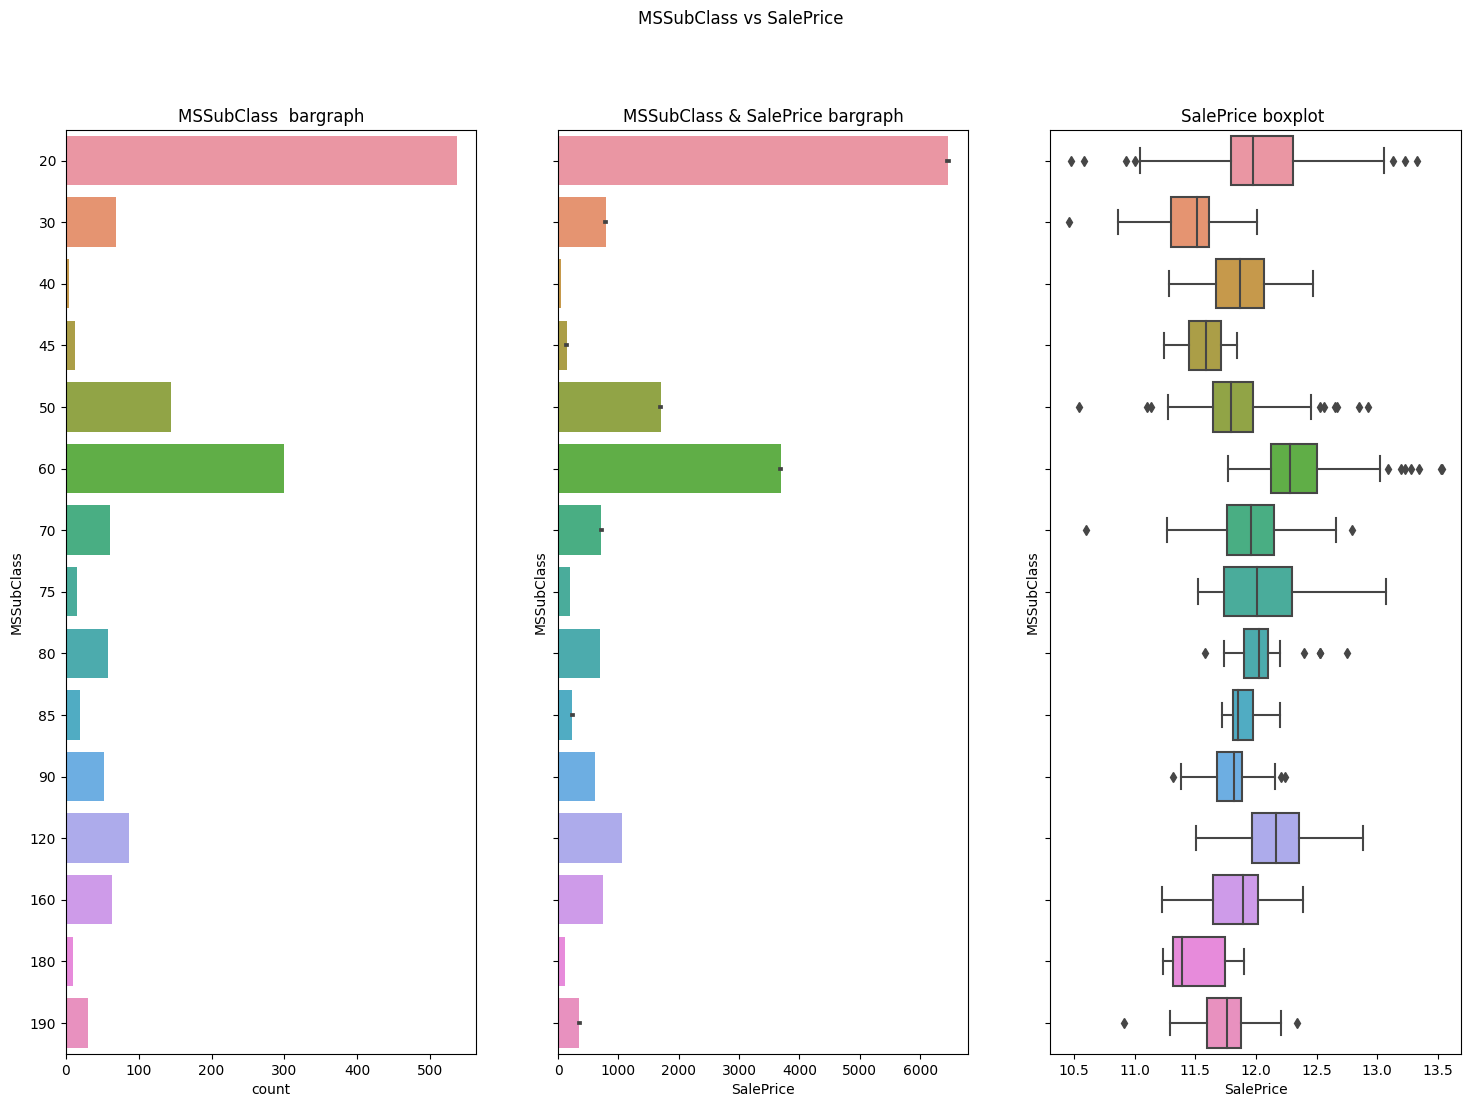

In [65]:
catgvssale(catgvar="MSSubClass",df=df)
check_column_skewness(df,"MSSubClass")

## LotFrontage
skewness = 0.26782238.
So there is no need to perform log transform. 

Even after applying log transform the value of skewness remains same becuadse the value is than 1.

0.26782238787732665

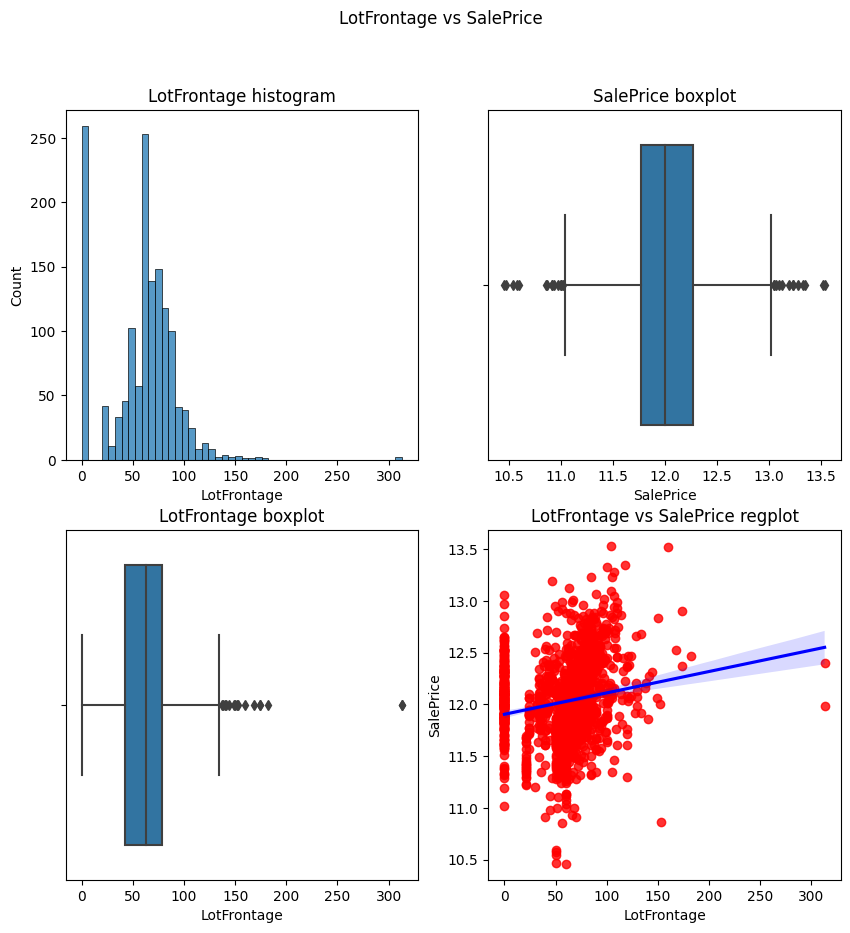

In [66]:
contvssale(contvar="LotFrontage",df=df)
check_column_skewness(df,"LotFrontage")
op = remove_skewness(df,"LotFrontage")
check_column_skewness(df,"LotFrontage")

## LotArea
skewness = -0.1374044.

The value is acceptable as it has already been transformed using the log transformation.

-0.13740448122837784

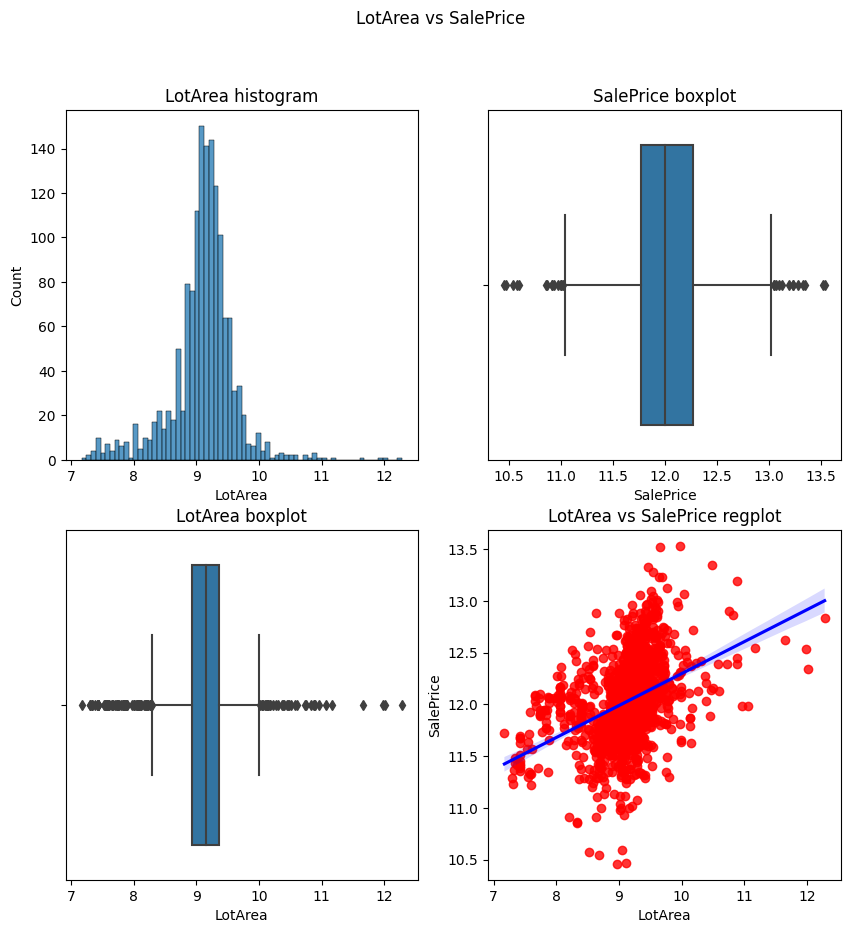

In [67]:
contvssale(contvar="LotArea",df=df)
check_column_skewness(df,"LotArea")

## YearBuilt
skewness = -0.6134611

As the skewness of the column is already less than 1 there is no need to apply the log transformation.

-0.613461172488183

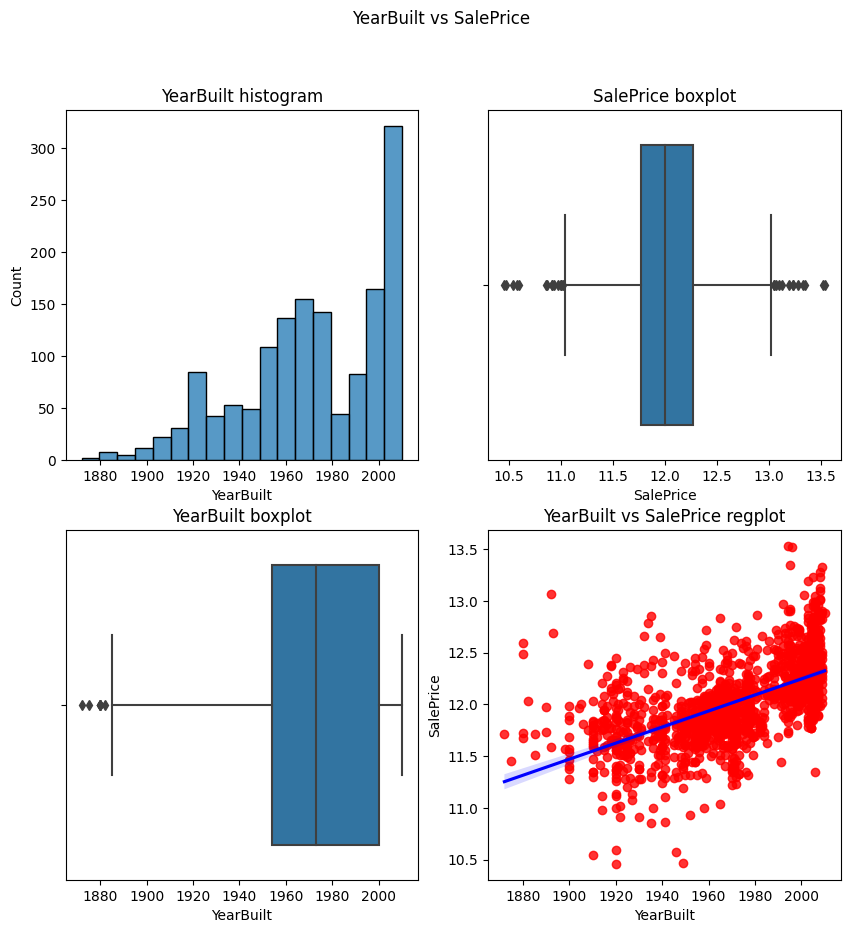

In [68]:
contvssale(contvar="YearBuilt",df=df)
check_column_skewness(df,"YearBuilt")

## YearRemodAdd
skewness=-0.503562002

As from the below countplot, boxplot and regplot we can see that this data is not skewed.


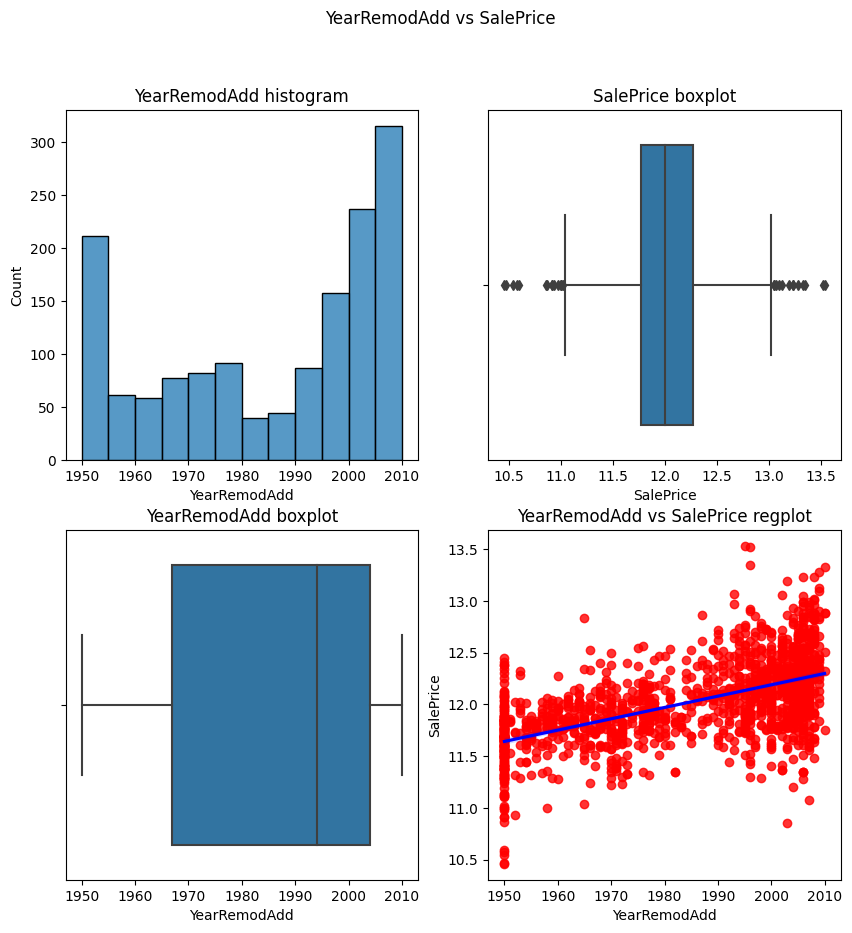

In [69]:
contvssale(contvar="YearRemodAdd",df=df)


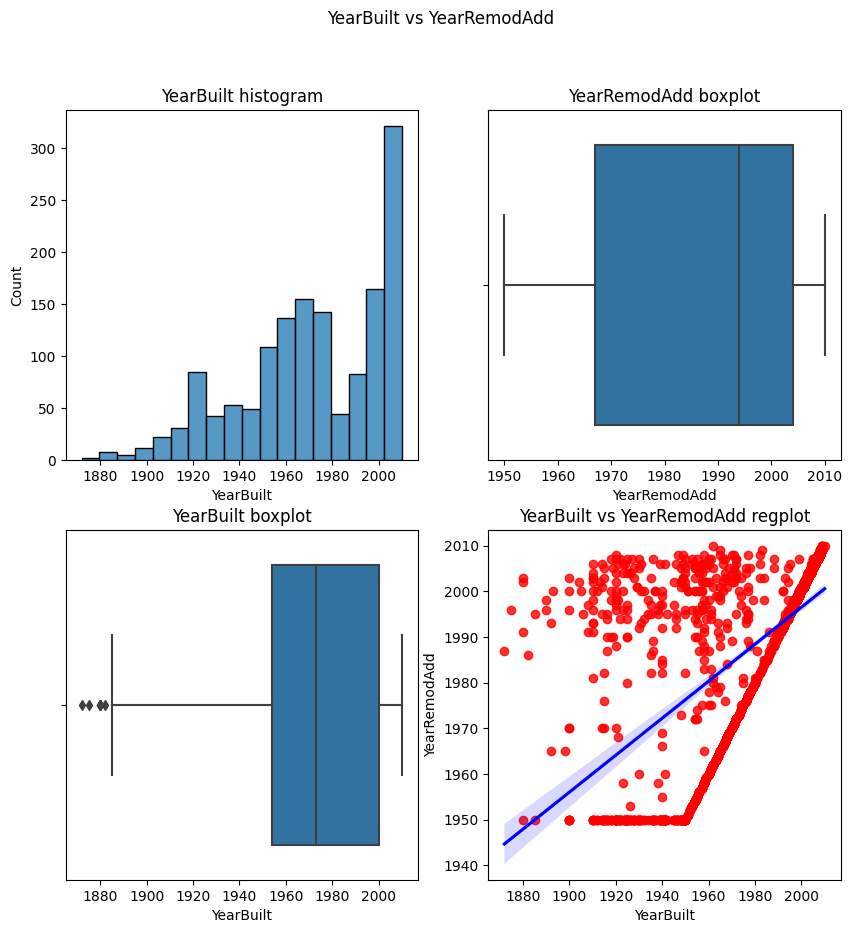

In [94]:
contvscont(contvar="YearBuilt",df=df,tarvar="YearRemodAdd")

## MasVnrArea
skewness = 2.677616

From the below graph we can see that this data is a little positively skewed so we can apply here log transformation.

skewness after = 0.50353171

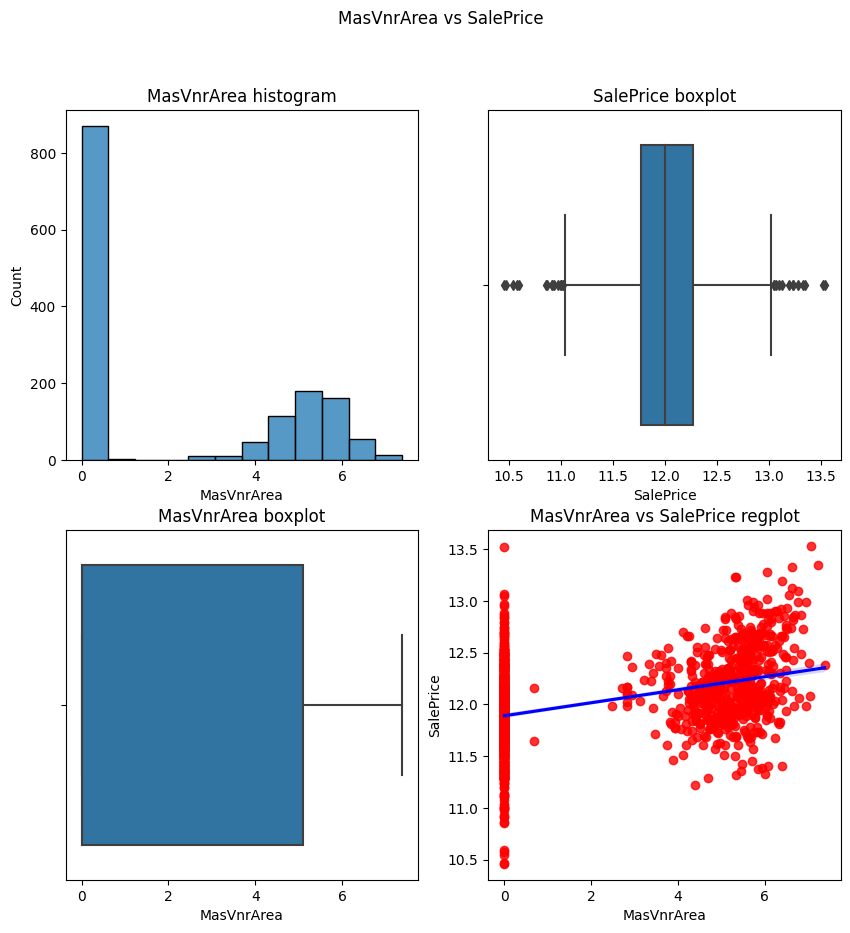

In [70]:

op = remove_skewness(df,"MasVnrArea")
check_column_skewness(df,"MasVnrArea")
contvssale(contvar="MasVnrArea",df=df)

## BsmtFinSF1
skewness = 1.685503071910789

From the regression plot as well as boxplot we can say that this data is slightly skewed as it has more confidence in the regression plot.

skewness = -0.618409817855514

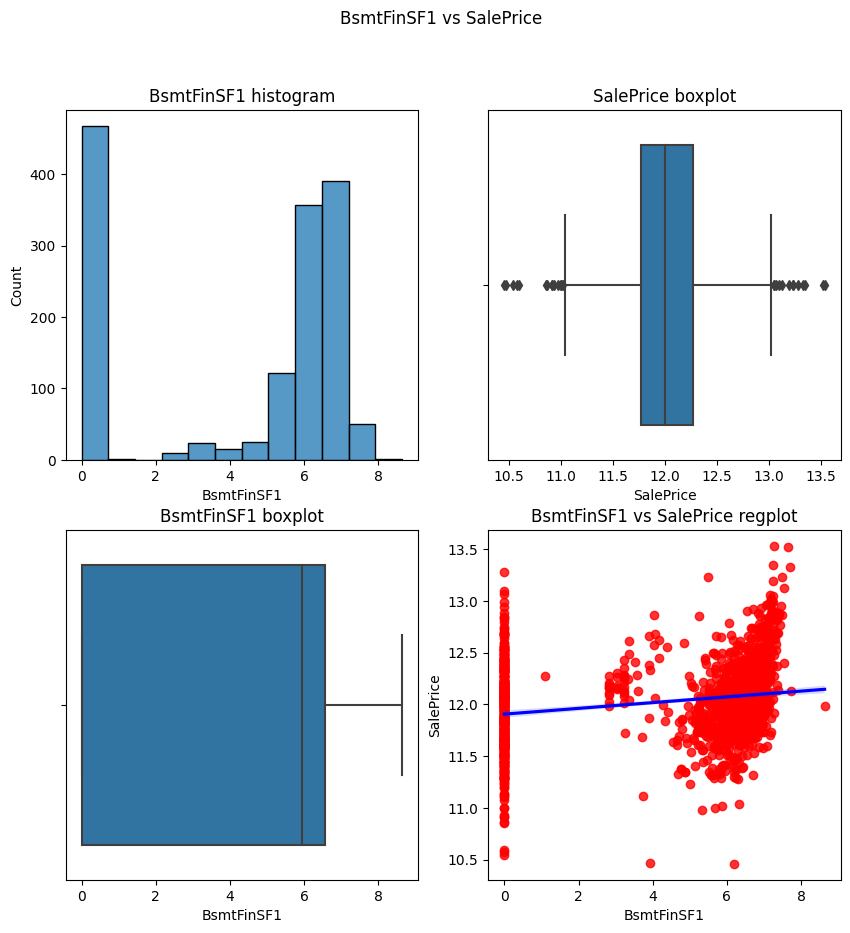

In [71]:
remove_skewness(df,"BsmtFinSF1")
check_column_skewness(df,"BsmtFinSF1")
contvssale(contvar="BsmtFinSF1",df=df)

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

--GarageYrBlt: Year garage was built

WoodDeckSF: Wood deck area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

## BsmtFinSF2: Type 2 finished square feet
skewness = 4.255261108933303

The data is positively skewed and may impact our model so we apply log transform.

skewness = 2.434961825856814

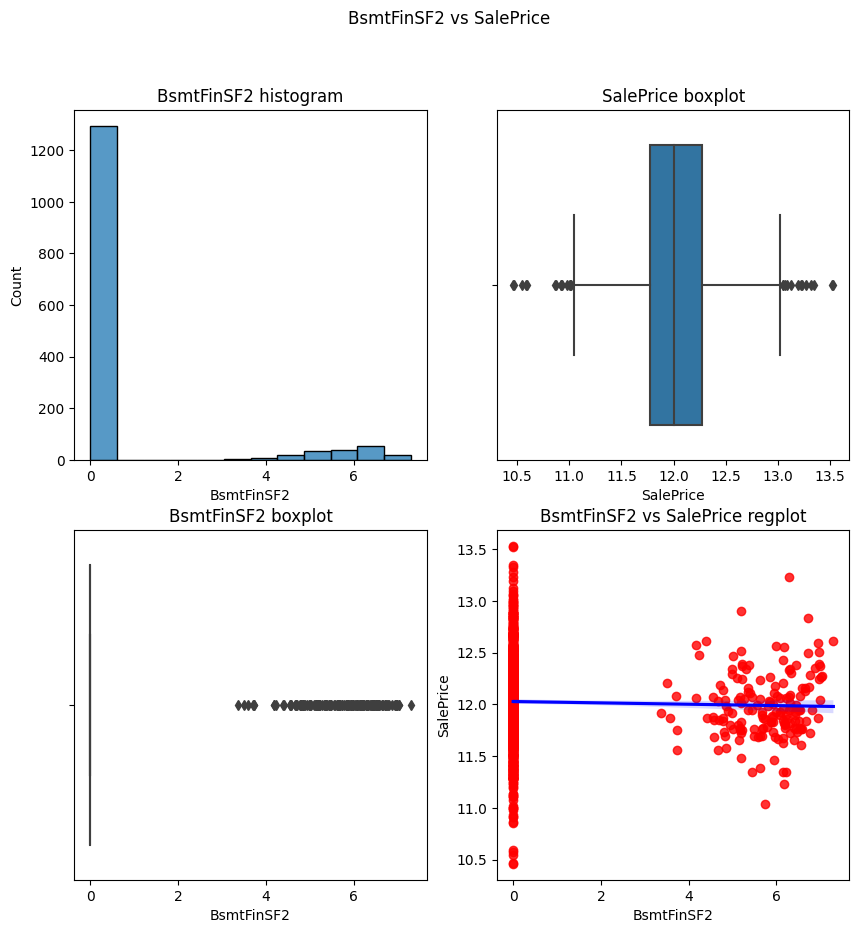

In [72]:
remove_skewness(df,"BsmtFinSF2")
check_column_skewness(df,"BsmtFinSF2")
contvssale(contvar="BsmtFinSF2",df=df)

## TotalBsmtSF: Total square feet of basement ??
skewness = 1.5242545490627664

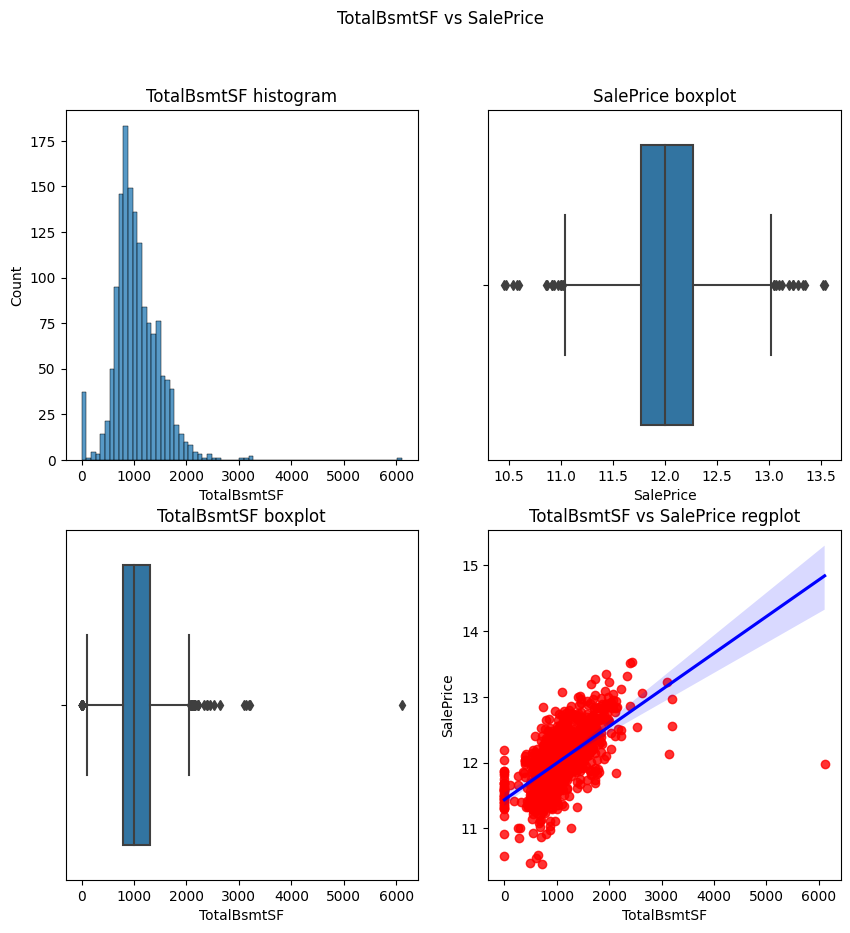

In [73]:
contvssale(contvar="TotalBsmtSF",df=df)

## LowQualFinSF: Low quality finished square feet (all floors) ??
skewness = 9.011341288465387 

after log transform skewness = 7.304428843591006

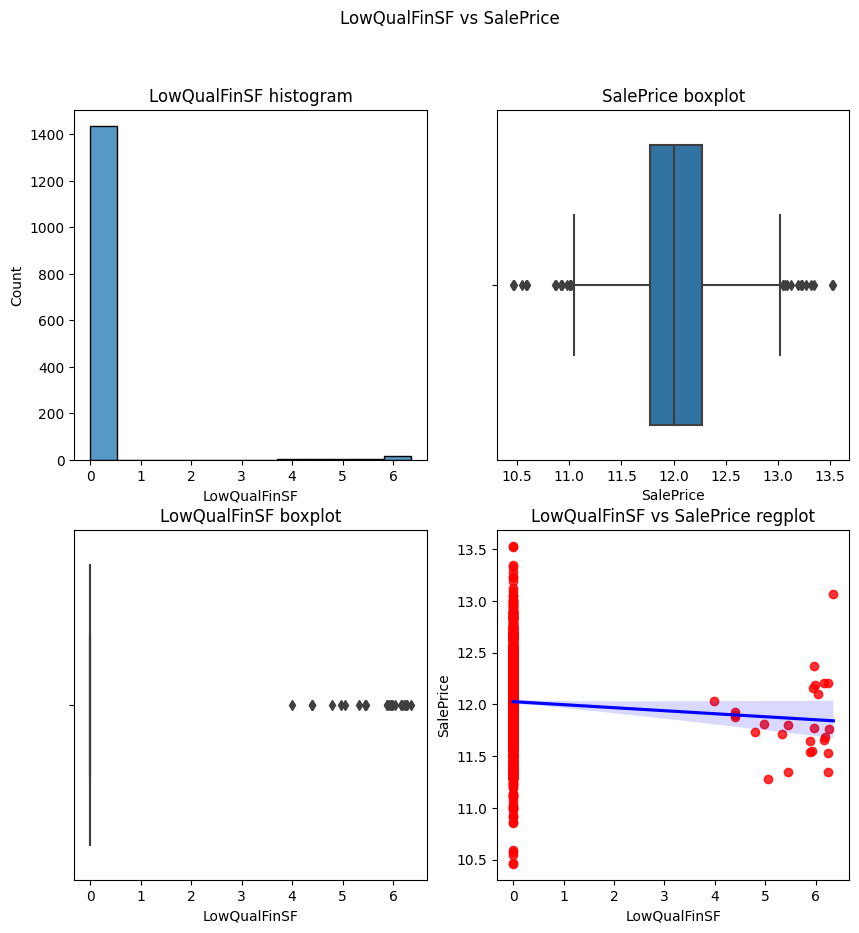

In [74]:
#contvssale(contvar="LowQualFinSF",df=df)

remove_skewness(df,"LowQualFinSF")
check_column_skewness(df,"LowQualFinSF")
contvssale(contvar="LowQualFinSF",df=df)

## GrLivArea: Above grade (ground) living area square feet
skewness = 1.3665603560164552

the skewness of this data is accepable so no need to apply the log transfrom as it would make it negatively skewed.

1.3665603560164552

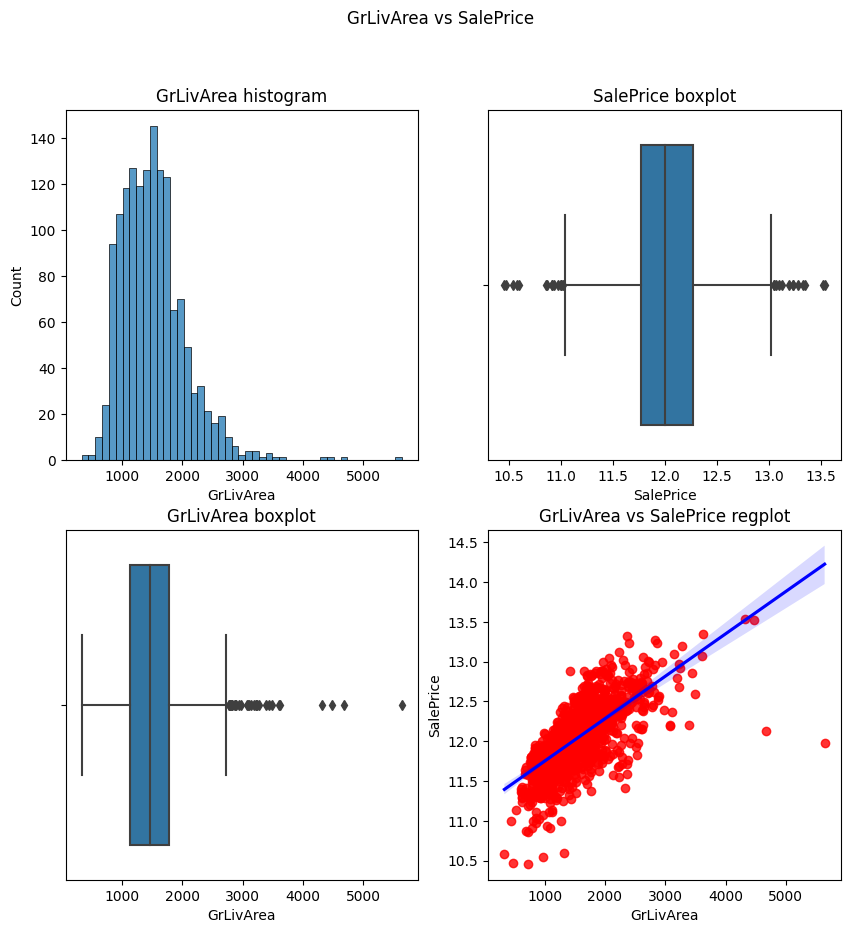

In [75]:
contvssale(contvar="GrLivArea",df=df)
check_column_skewness(df,"GrLivArea")

## FullBath: Full bathrooms above grade
From the regression plot as well as the boxplot we can conclude that the data is not skewed.

skewness = 0.036561558402727165

0.036561558402727165

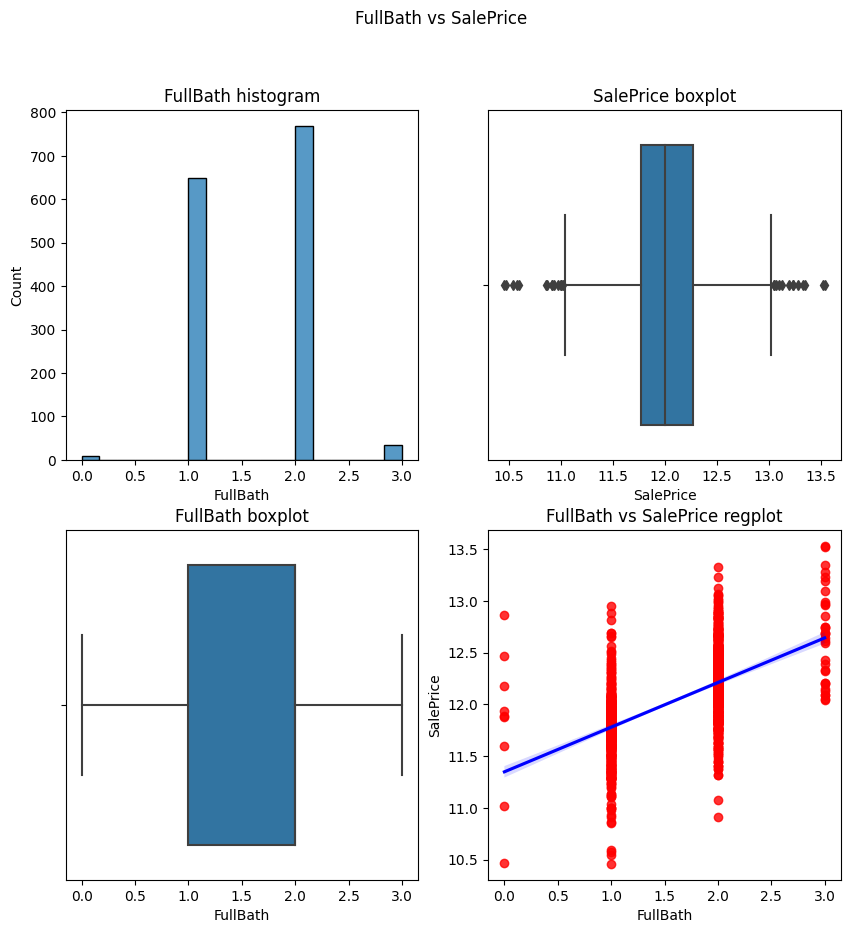

In [76]:
contvssale(contvar="FullBath",df=df)
check_column_skewness(df,"FullBath")

## HalfBath: Half baths above grade
from the below visualization we can say that the data is not skewed and is under the skew limit of 1.

skewness = 0.675897448233722

0.675897448233722

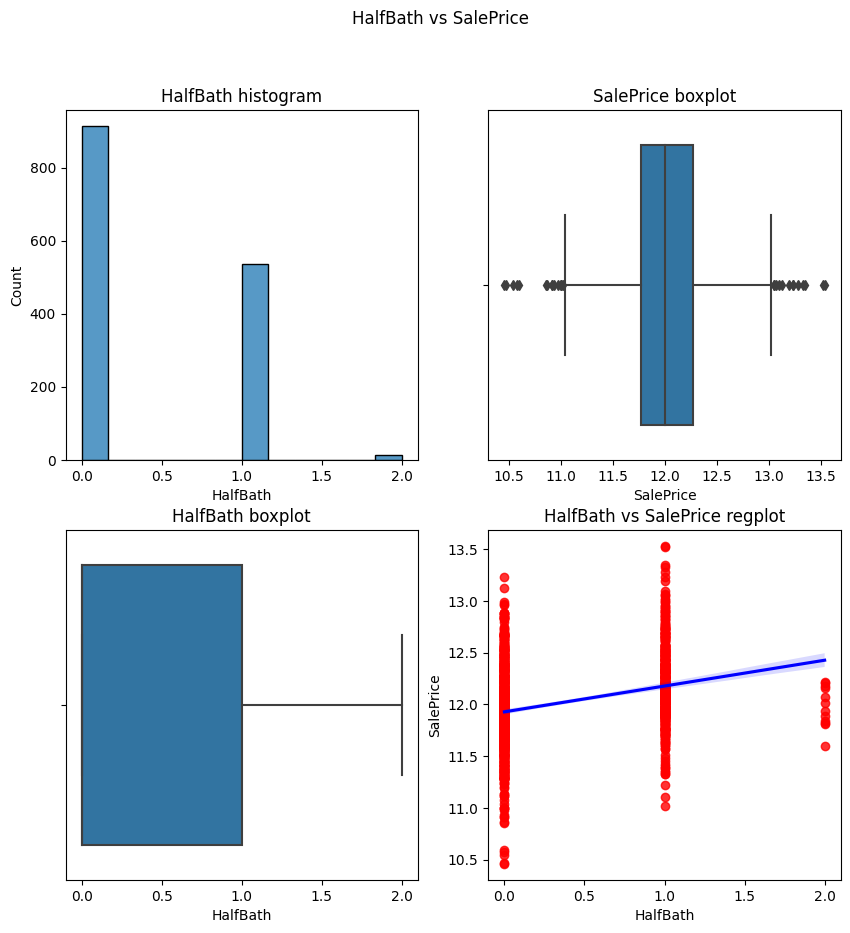

In [77]:
contvssale(contvar="HalfBath",df=df)
check_column_skewness(df,"HalfBath")

## BedroomAbvGr: Bedrooms above grade ??

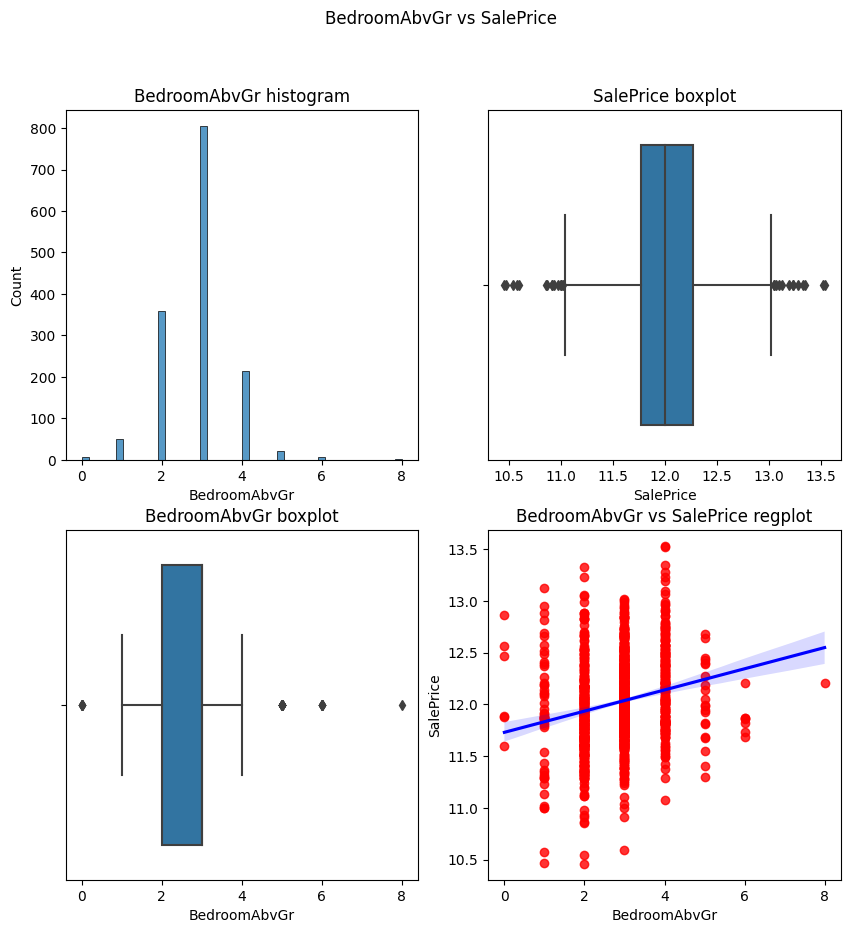

In [78]:
contvssale(contvar="BedroomAbvGr",df=df)

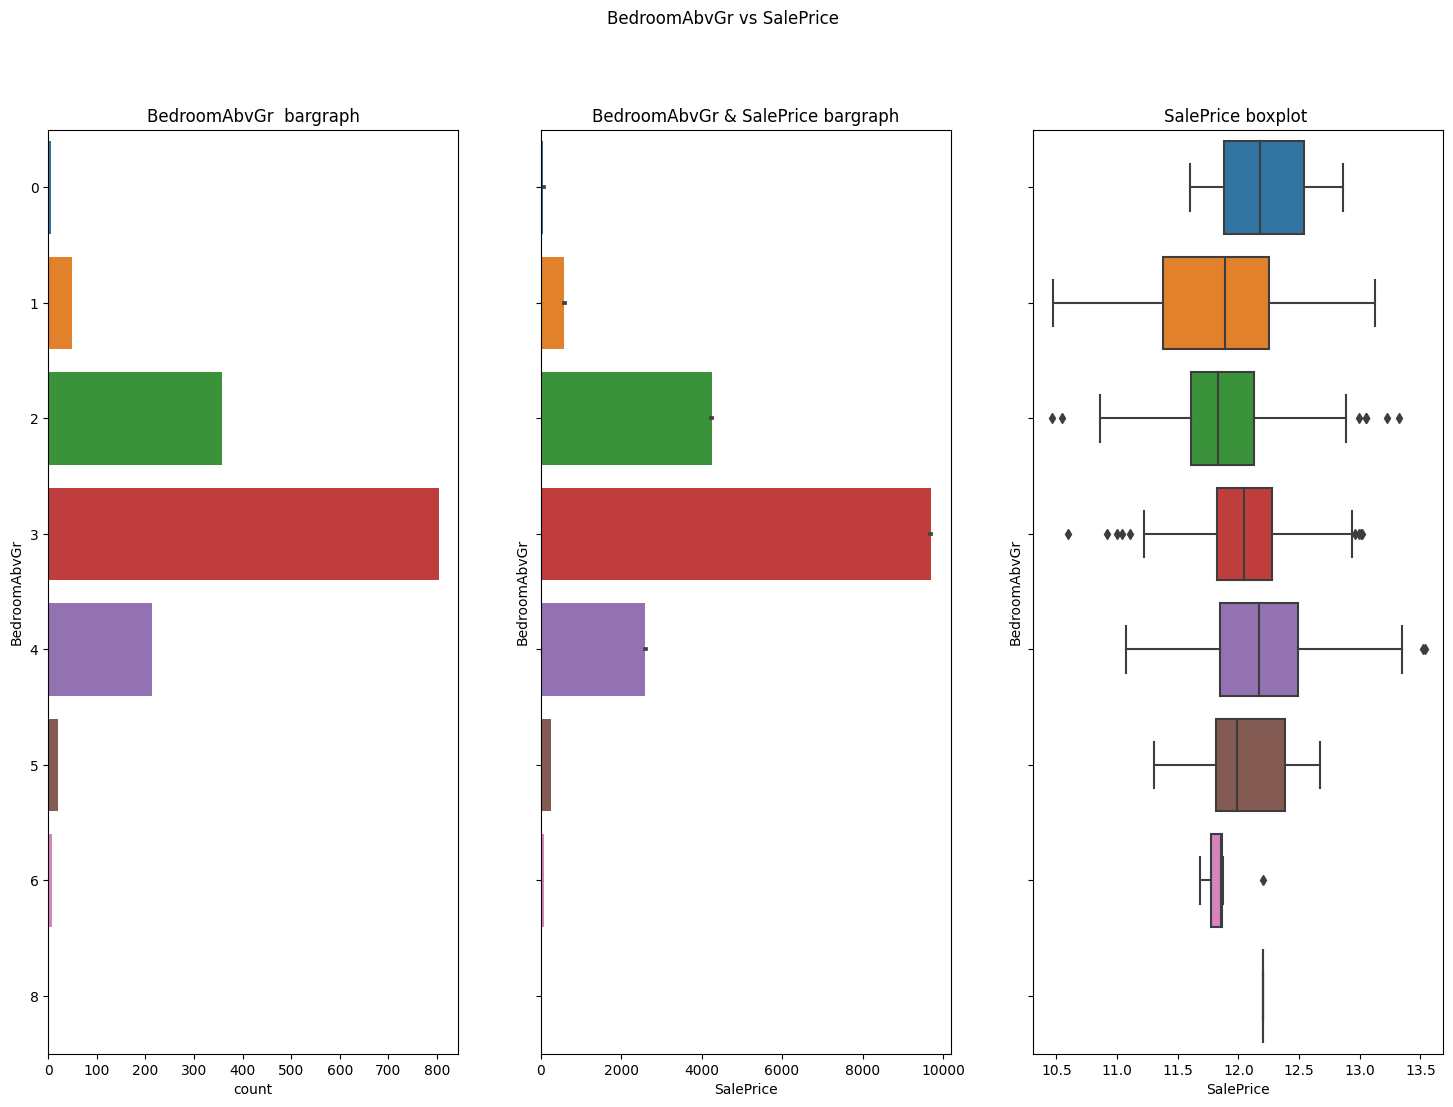

In [79]:
catgvssale(catgvar="BedroomAbvGr",df=df)

## KitchenAbvGr: Kitchens above grade ??

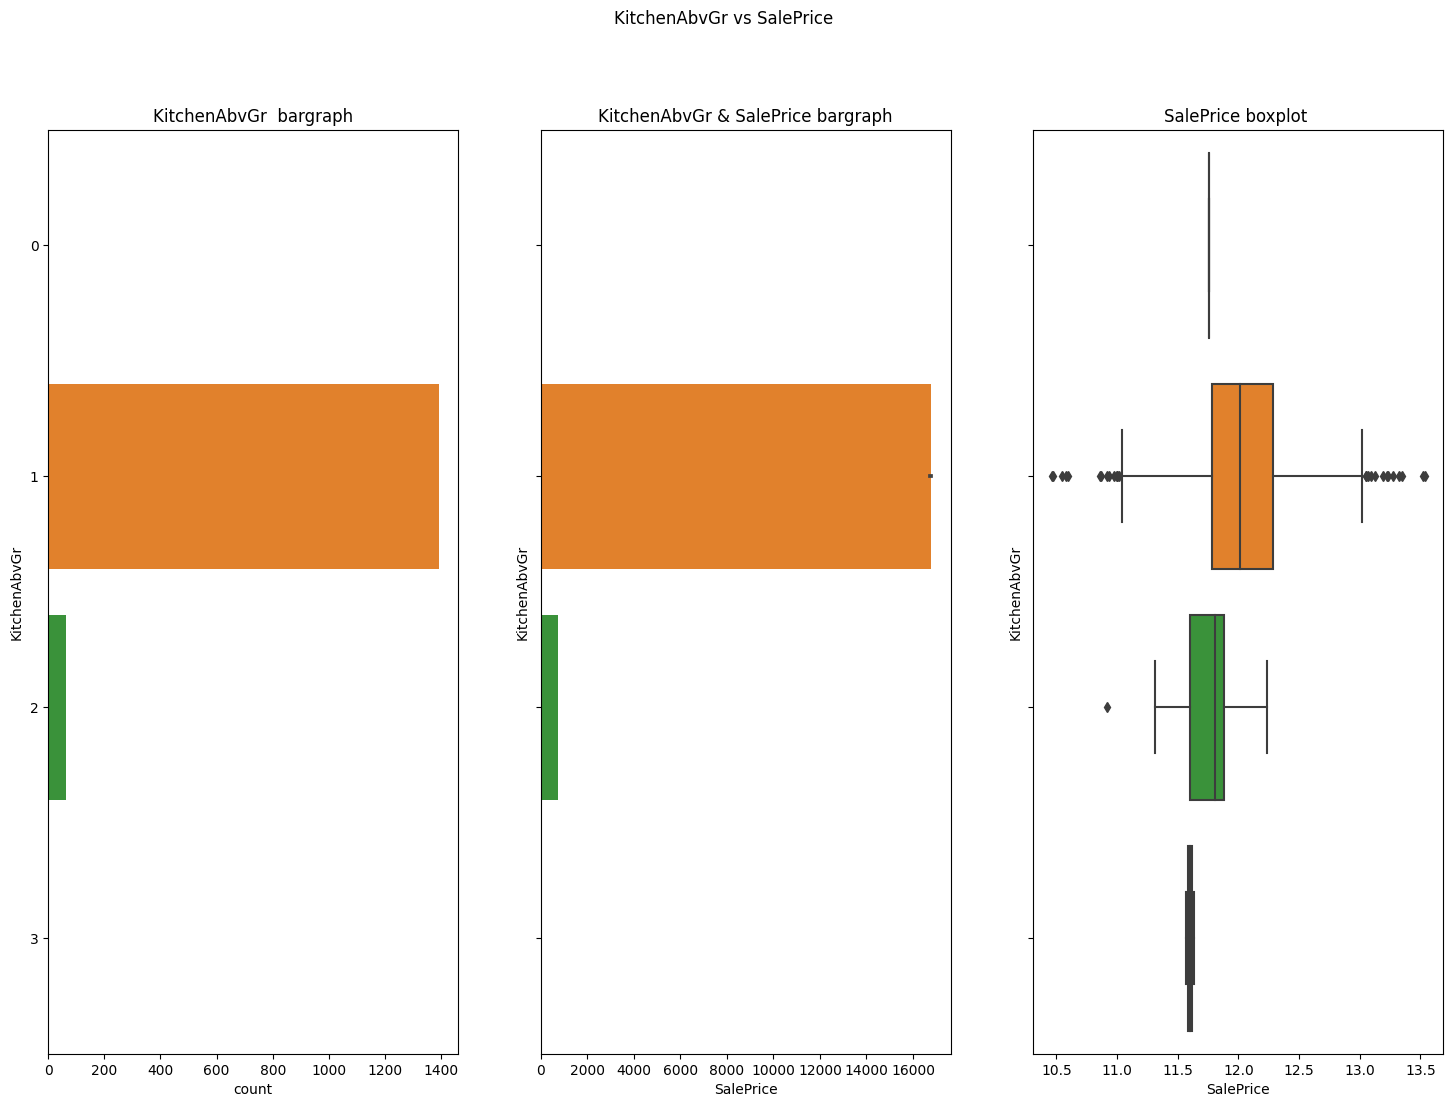

In [80]:
catgvssale(catgvar="KitchenAbvGr",df=df)

## TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
from the below info we can see that the data is under the skew limit and the graph is normal.

skewness = 0.6763408364355531

0.6763408364355531

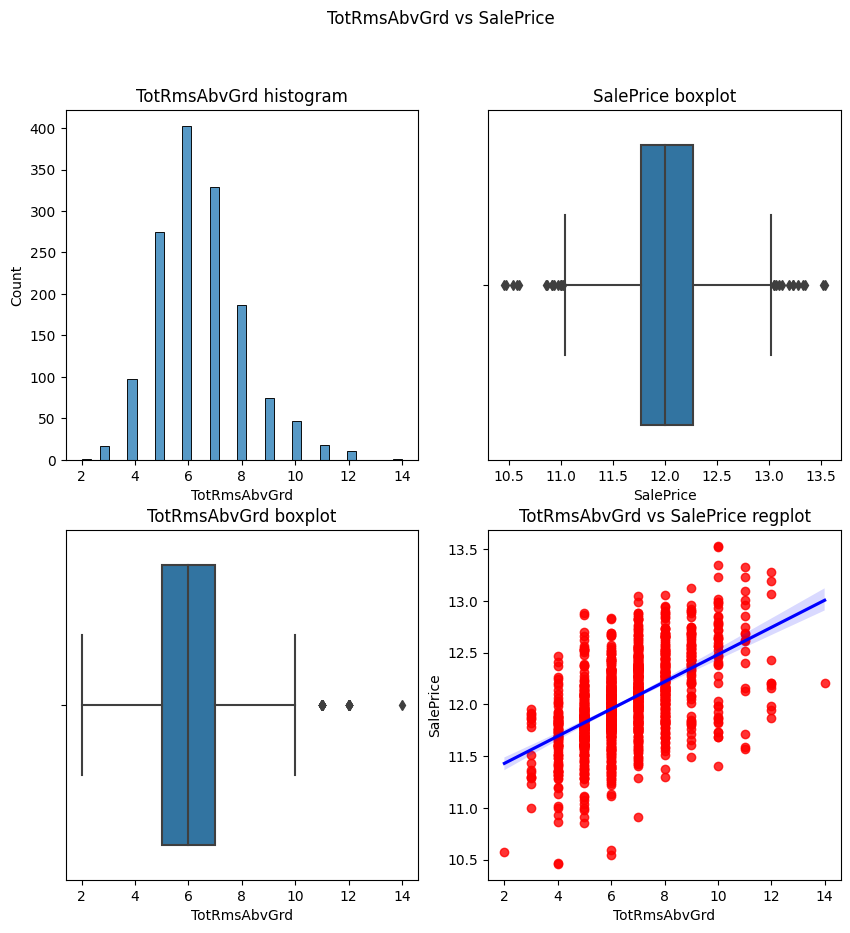

In [81]:
contvssale(contvar="TotRmsAbvGrd",df=df)
check_column_skewness(df,"TotRmsAbvGrd")

## Fireplaces: Number of fireplaces
The data is under the skewness limit of 1.

It can be seen from the graphs as well.

skewness = 0.6495651830548841

0.6495651830548841

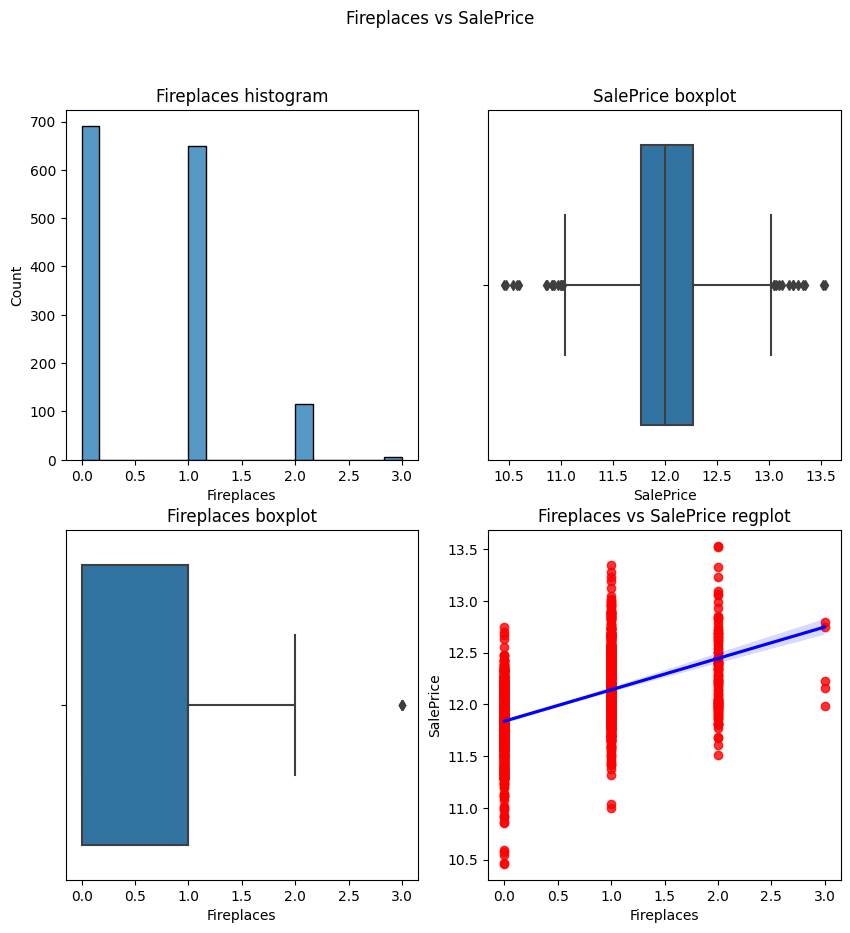

In [82]:
contvssale(contvar="Fireplaces",df=df)
check_column_skewness(df,"Fireplaces")

## GarageCars: Size of garage in car capacity
from the below visualization it can be predicted that this data column is not skewed its normal.

skewness = -0.3425489297486655

-0.3425489297486655

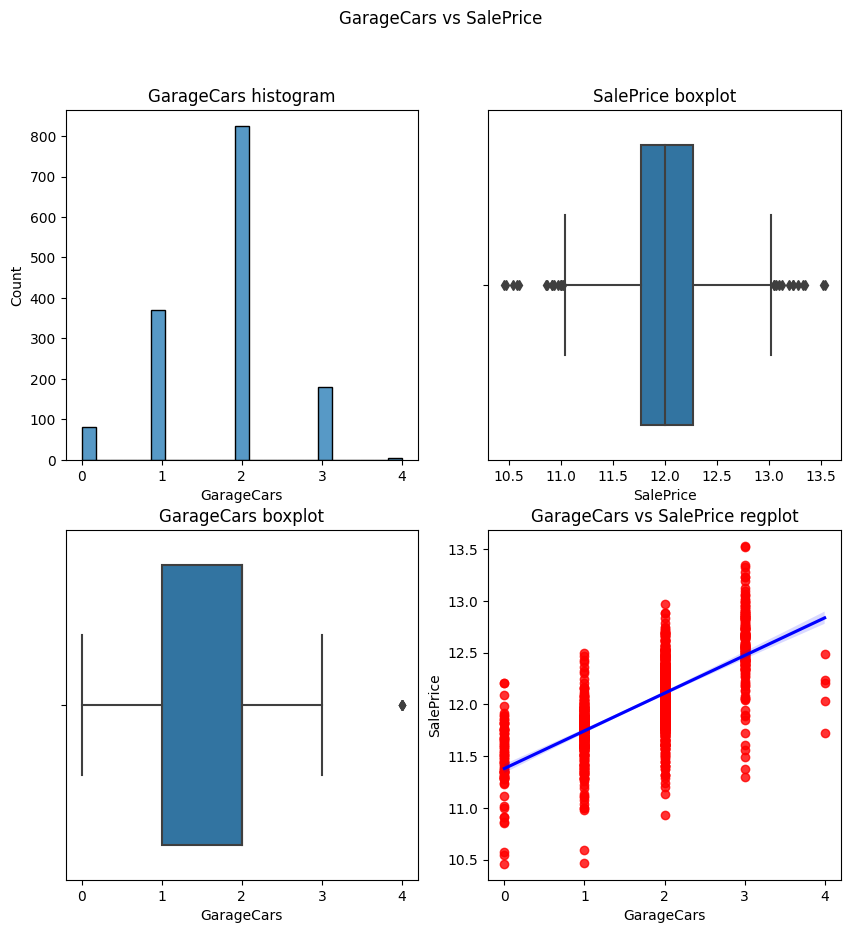

In [83]:
contvssale(contvar="GarageCars",df=df)
check_column_skewness(df,"GarageCars")

## GarageArea: Size of garage in square feet
skewness = 0.17998090674623907

Data column is acceptable

0.17998090674623907

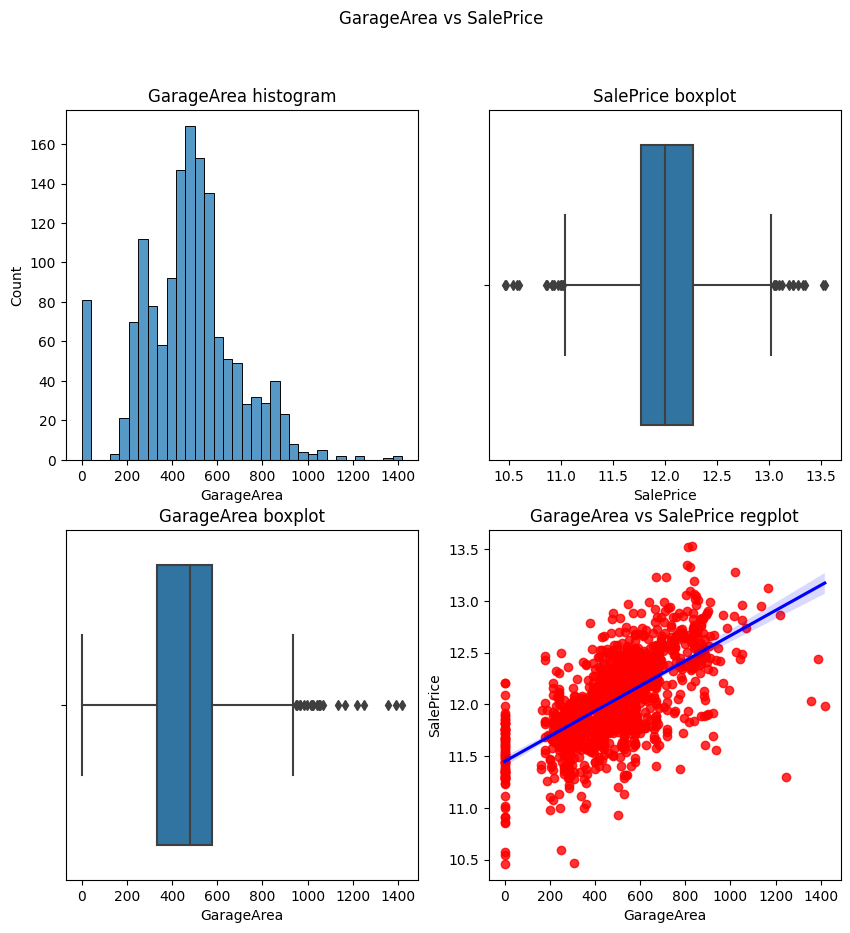

In [84]:
contvssale(contvar="GarageArea",df=df)
check_column_skewness(df,"GarageArea")

## WoodDeckSF: Wood deck area in square feet ??
skewness = 1.5413757571931312

1.5413757571931312

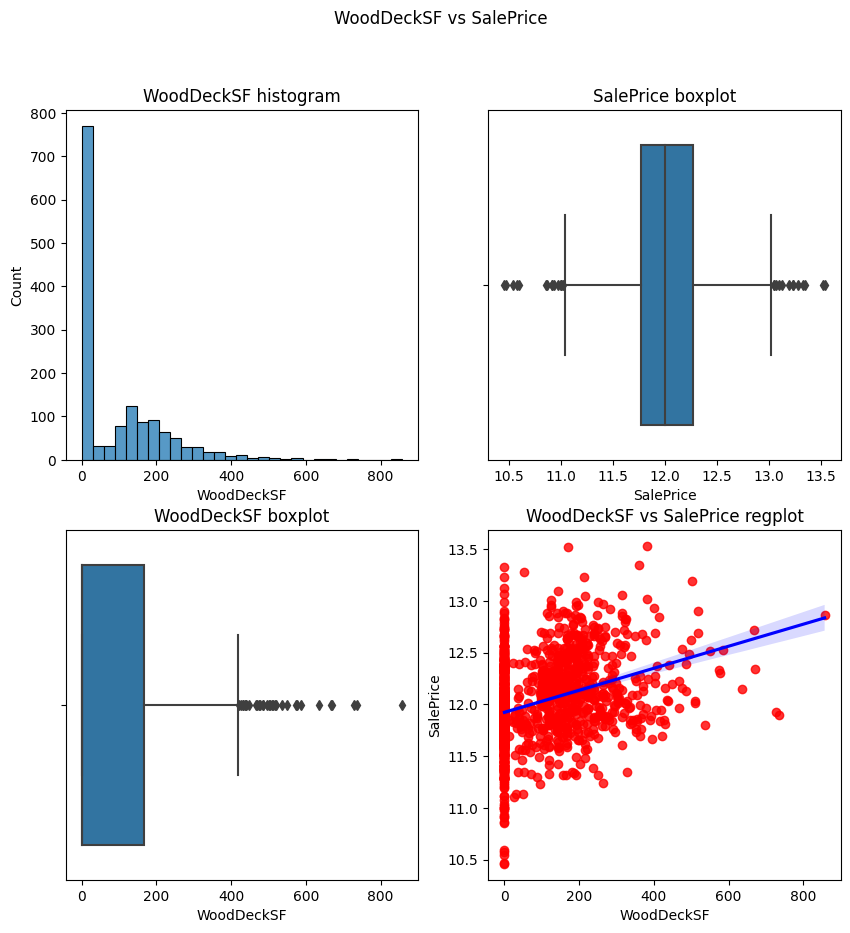

In [85]:
contvssale(contvar="WoodDeckSF",df=df)
check_column_skewness(df,"WoodDeckSF")

## OpenPorchSF: Open porch area in square feet
skewness = 2.3643417403694404 

skewness after = -0.02339729485739231

2.3643417403694404

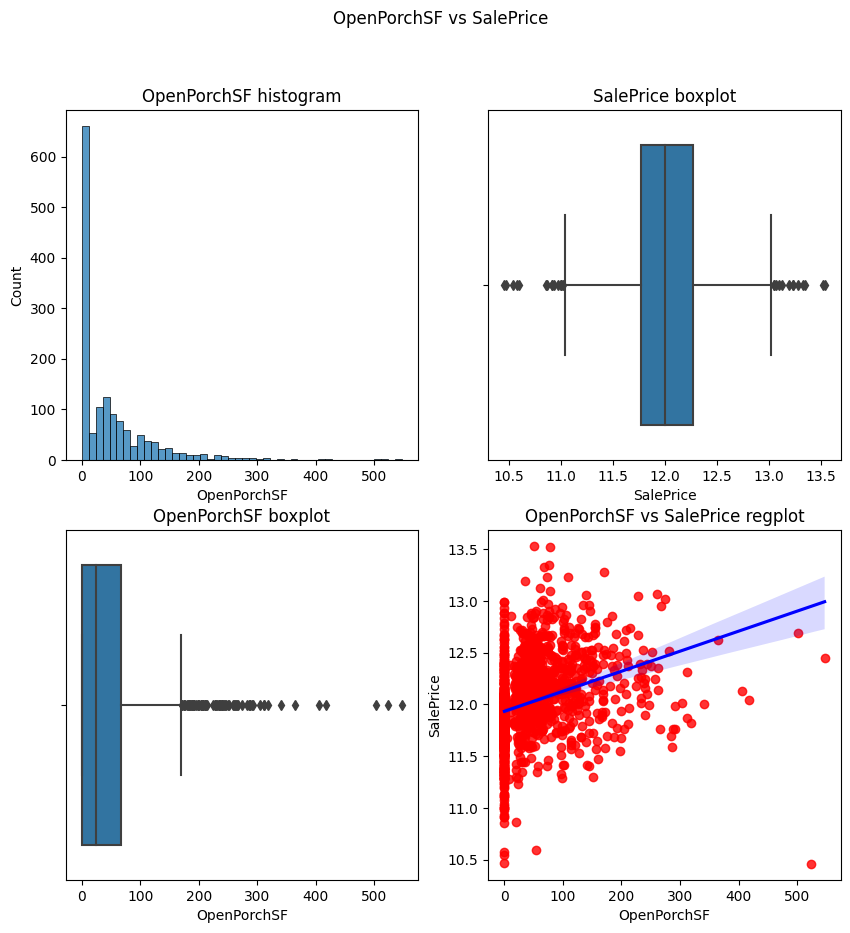

In [86]:
contvssale(contvar="OpenPorchSF",df=df)
check_column_skewness(df,"OpenPorchSF")

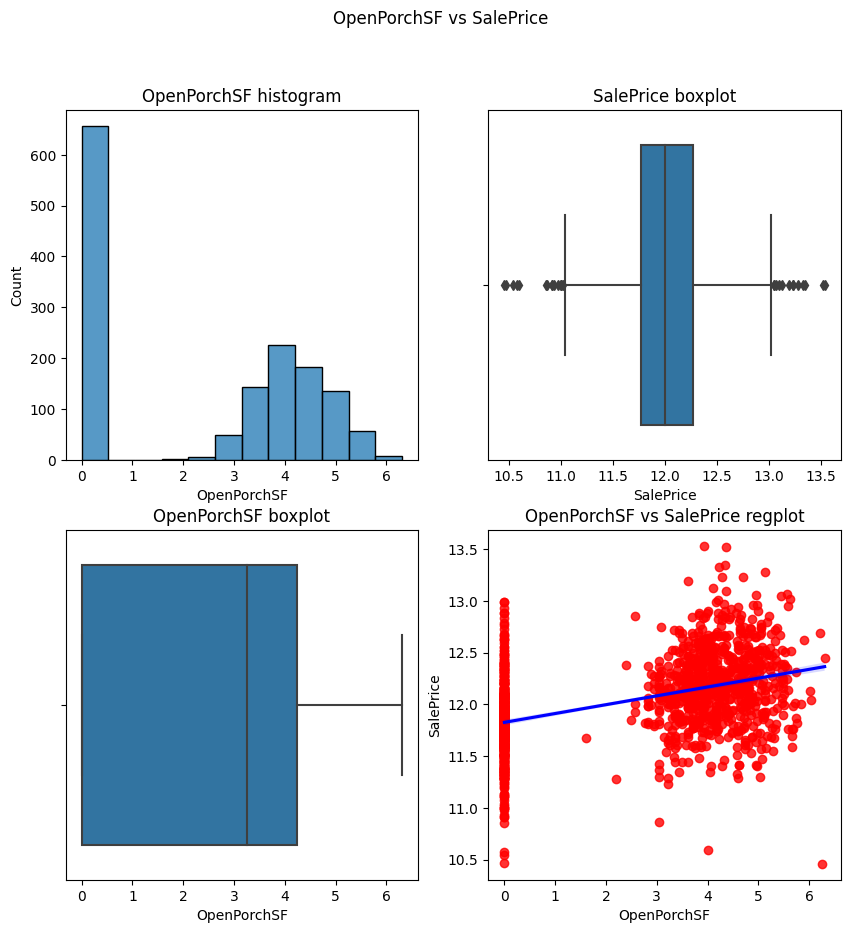

In [87]:
remove_skewness(df,"OpenPorchSF")
check_column_skewness(df,"OpenPorchSF")
contvssale(contvar="OpenPorchSF",df=df)

## EnclosedPorch: Enclosed porch area in square feet
skewness = 3.08987190371177

afterward skewness = 2.0550505544496978

3.08987190371177

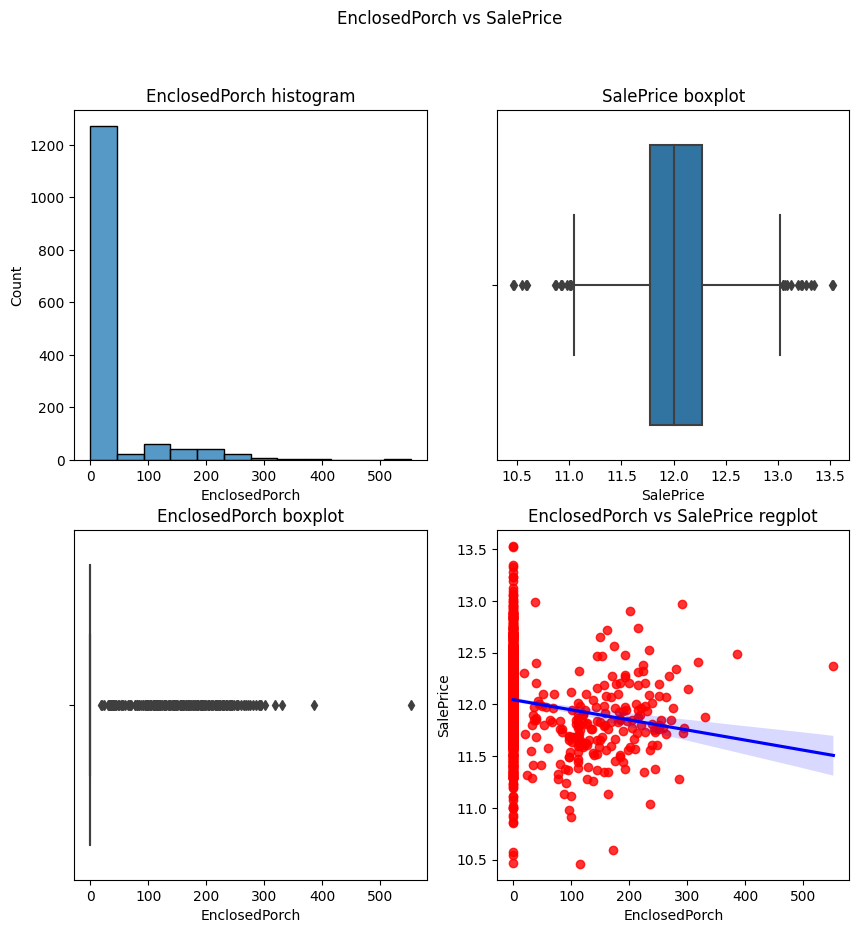

In [88]:
contvssale(contvar="EnclosedPorch",df=df)
check_column_skewness(df,"EnclosedPorch")

In [89]:
remove_skewness(df,"EnclosedPorch")
check_column_skewness(df,"EnclosedPorch")
#contvssale(contvar="EnclosedPorch",df=df)

2.1122749483873156

In [90]:
remove_skewness(df,"EnclosedPorch")
check_column_skewness(df,"EnclosedPorch")

2.0647625664968623

In [91]:
remove_skewness(df,"EnclosedPorch")
check_column_skewness(df,"EnclosedPorch")

2.0550505544496978

In [92]:
remove_skewness(df,"EnclosedPorch")
check_column_skewness(df,"EnclosedPorch")

2.0517457757083504

## PoolArea: Pool area in square feet ??
highly positively skewed data 

skewness = 14.828373640750588

skewness after logtransform = 14.353385939511323

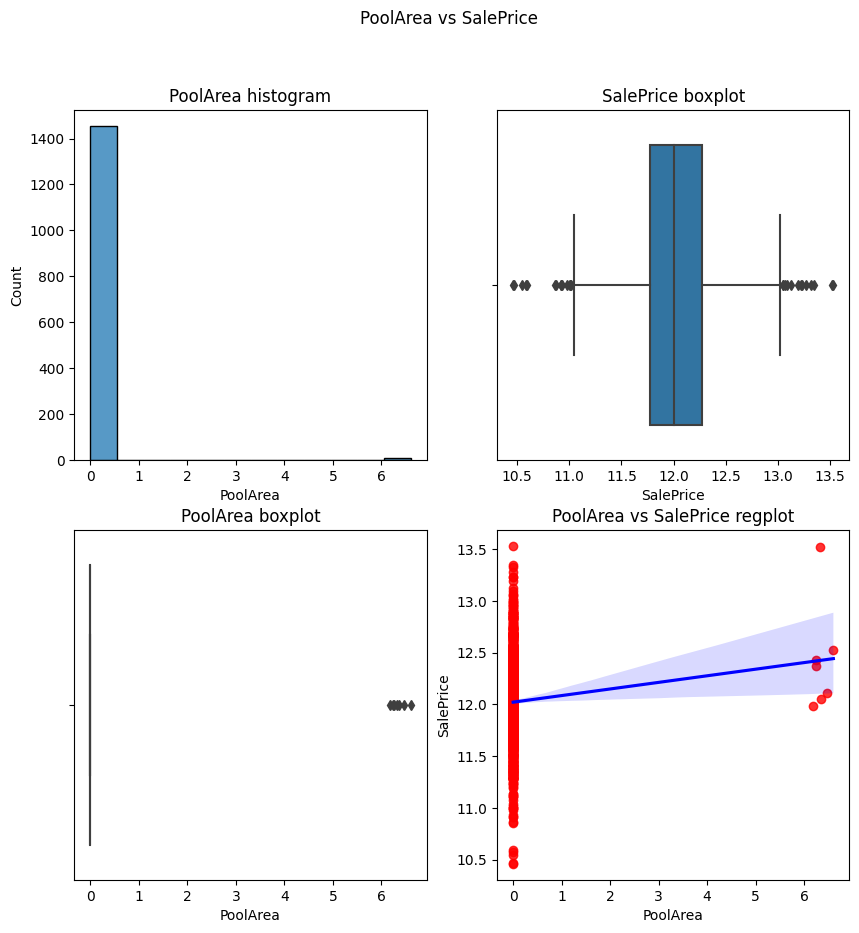

In [93]:
#contvssale(contvar="PoolArea",df=df)
remove_skewness(df,"PoolArea")
check_column_skewness(df,"PoolArea")
contvssale(contvar="PoolArea",df=df)